In [1]:
# Install IRkernel
# install.packages('IRkernel')
# IRkernel::installspec()

In [2]:
options(repr.plot.width = 16, repr.plot.height = 7)

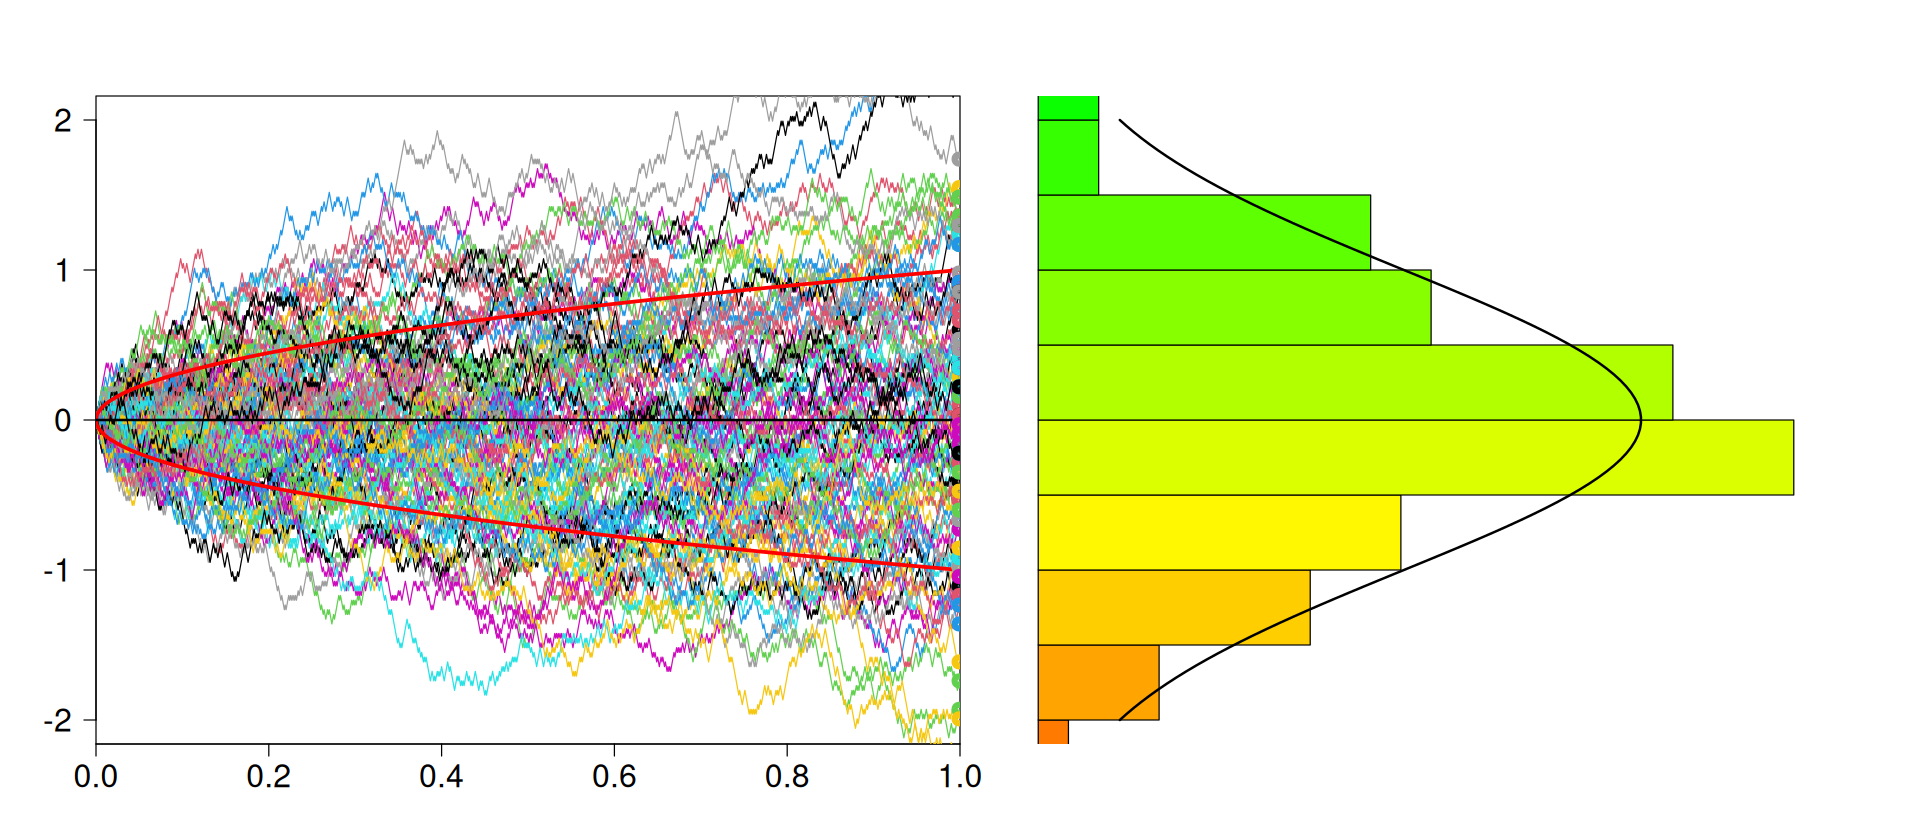

In [3]:
beta=.5; nsim=100; N=1000; t=0:N; dt=1.0/N; # dev.new(width=16,height=7);
X=matrix((dt)^beta*(rbinom( nsim * N, 1,.5)-.5)*2, nsim, N)
X=cbind(rep(0, nsim), t(apply(X, 1, cumsum))); H=hist(X[,N],plot=FALSE);
layout(matrix(c(1,2), nrow =1, byrow = TRUE));par(mar=c(2,2,2,0), oma = c(2, 2, 2, 2))
plot(t*dt, X[1, ], type="l", ylim=c(-2,2), col=0, xaxs="i", las=1, cex.axis=1.6)
for (i in 1:nsim){lines(t*dt, X[i, ], type = "l", ylim = c(-2, 2), col = i)}
lines(t*dt,sqrt(t*dt),lty=1,col="red",lwd=3);lines(t*dt,-sqrt(t*dt), lty=1, col="red",lwd=3)
lines(t*dt,0*t, lty=1, lwd=2); for (i in 1:nsim){points(.999, X[i,N], pch=1, lwd = 5, col = i)};
x=seq(-2,2, length=100); px=dnorm(x);par(mar = c(2,2,2,2))
plot(NULL , xlab="", ylab="", xlim = c(0, max(px,H$density)), ylim = c(-2,2),axes=F)
rect(0, H$breaks[1:(length(H$breaks) - 1)], col=rainbow(20,start=.08,end=.6), H$density,
H$breaks[2:length(H$breaks)]); lines(px,x, lty=1, lwd=2)

In [4]:
# install.packages("quantmod")
library(quantmod)
getSymbols("AAPL", src = "yahoo")
getSymbols("GOOG", src = "yahoo")

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "AAPL"

[1] "GOOG"

[1] "DJI"

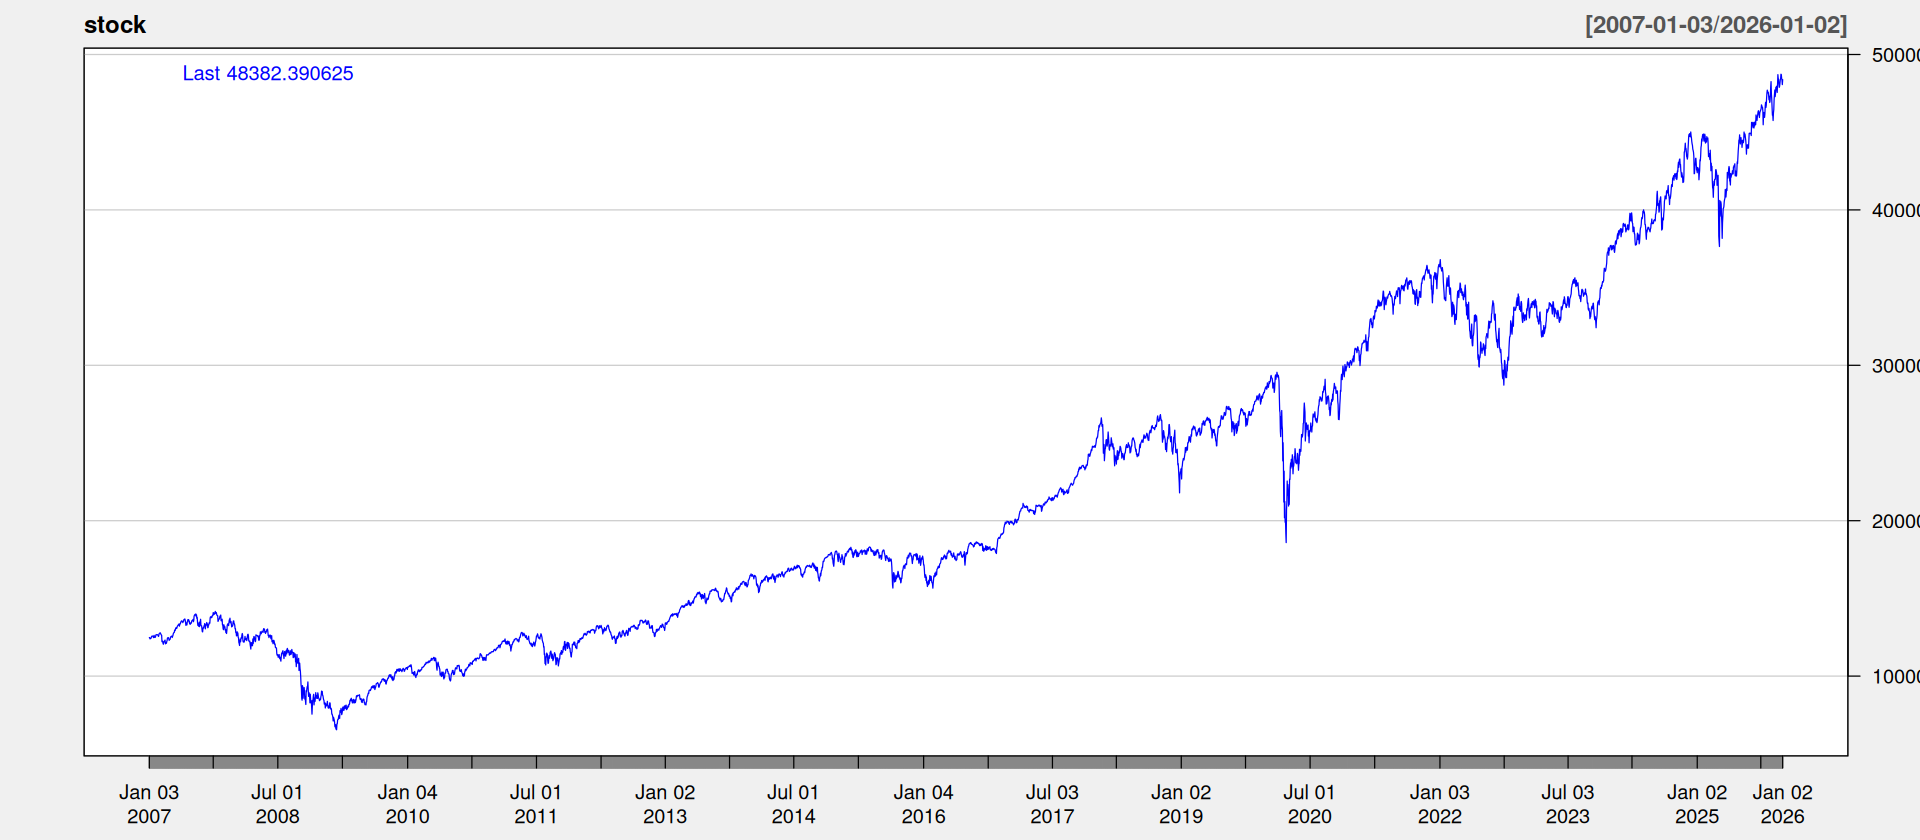

In [5]:
getSymbols("^DJI",from="2007-01-03",to=Sys.Date(),src="yahoo"); stock=Ad(`DJI`)
# dev.new(width=12, height=8);
chartSeries(stock,up.col="blue",theme="white"); stock.logrtn=diff(log(stock)); # log returns
stk.rtn=(stock-lag(stock))/lag(stock);dev.new(width=12, height=8) # standard returns
chartSeries(stk.rtn,up.col="blue",theme="white"); n= length(!is.na(stk.rtn))

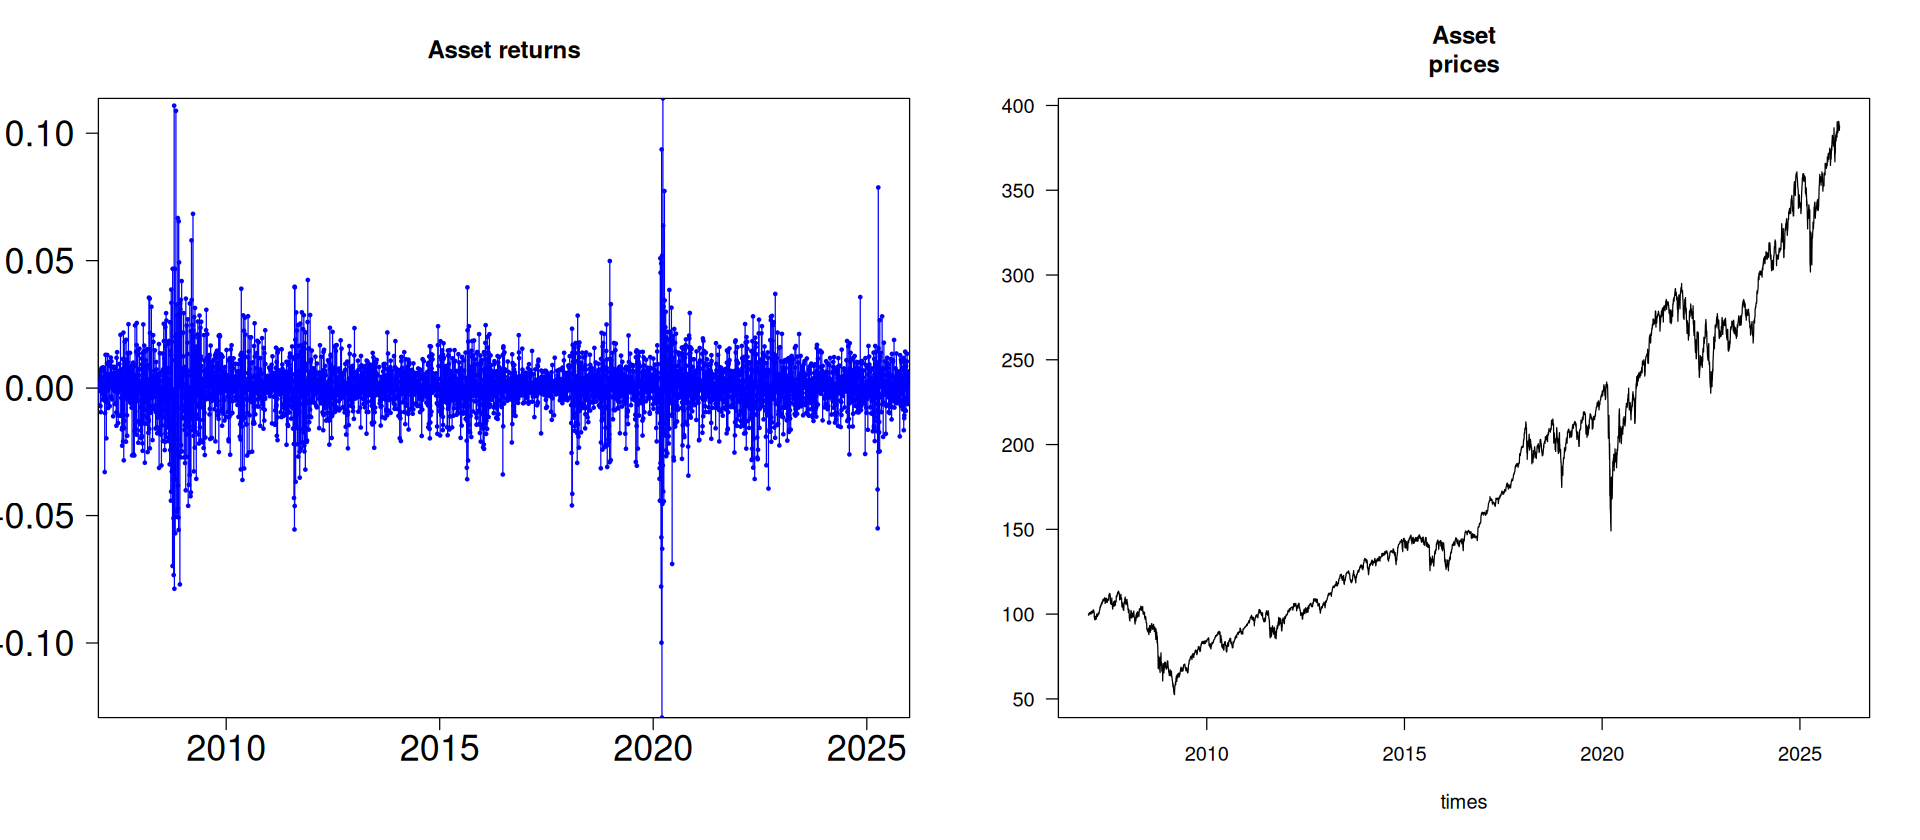

In [6]:
stock<-stock[!is.na(stk.rtn)];stk.rtn<-stk.rtn[!is.na(stk.rtn)]
times=index(stock); # dev.new(width=16,height=7)
par(mfrow=c(1,2))
plot(times,stk.rtn,pch=19,xaxs="i",yaxs="i",cex=.03,col="blue", ylab="", xlab="", main=
'Asset returns', las=1, cex.lab=1.8, cex.axis=1.8, lwd=3)
segments(x0= times, x1= times, y0= 0, y1= stk.rtn,col="blue")
plot(times,100 * cumprod(1 + as.numeric(stk.rtn)),type='l',col='black',main= "Asset
prices",ylab="", cex=.1,cex.axis=1,las=1)

Warning message in matrix(rnorm(nsim * N, mean = 0, sd = sqrt(dt)), nsim, N + 1):
“data length [20000] is not a sub-multiple or multiple of the number of columns [2001]”


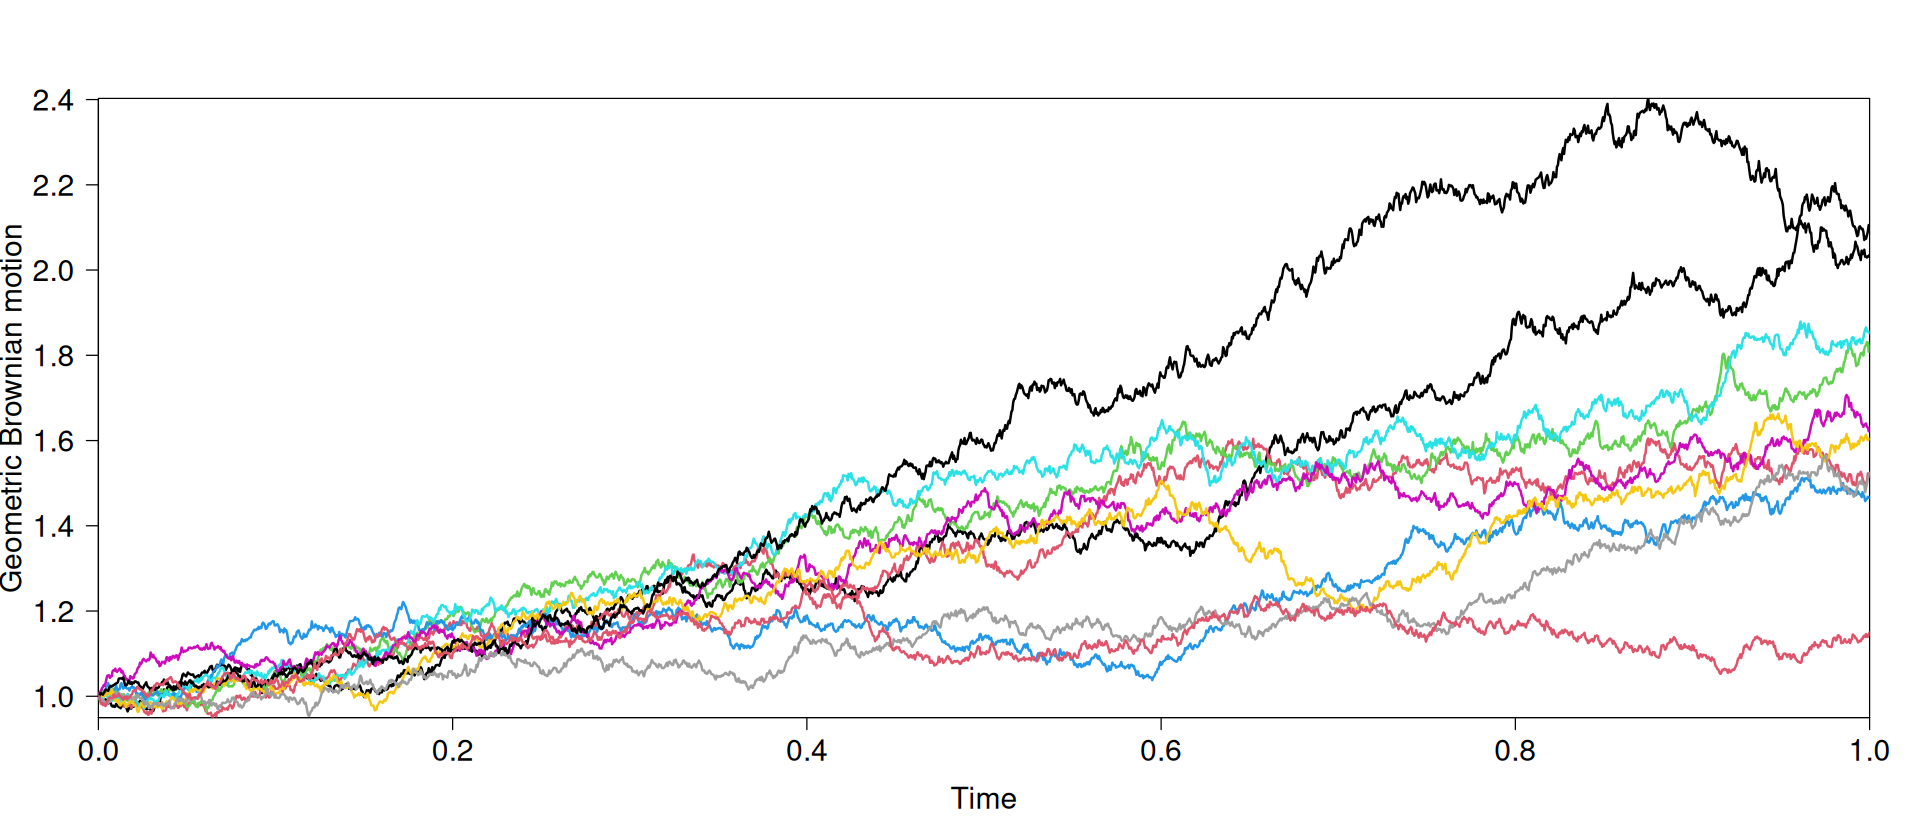

In [7]:
N=2000; t<- 0:N; dt<- 1.0/N;mu=.5; sigma=.2; nsim<- 10; S<- matrix(0, nsim, N+1)
Z<- matrix(rnorm(nsim*N,mean=0,sd=sqrt(dt)), nsim, N+1); for (i in 1:nsim){S[i,1]=1.0;
for (j in 1:N+1){S[i,j]=S[i,j-1]*(1 + mu*dt+sigma*Z[i,j])}}
plot(t*dt, rep(0, N+1), xlab= "Time", ylab= "Geometric Brownian motion", lwd=2, ylim=
c(min(S),max(S)), type= "l", col= 0,las=1, cex.axis=1.5,cex.lab=1.5, xaxs='i', yaxs='i')
for (i in 1:nsim){lines(t*dt, S[i, ], lwd=2, type= "l", col= i)}

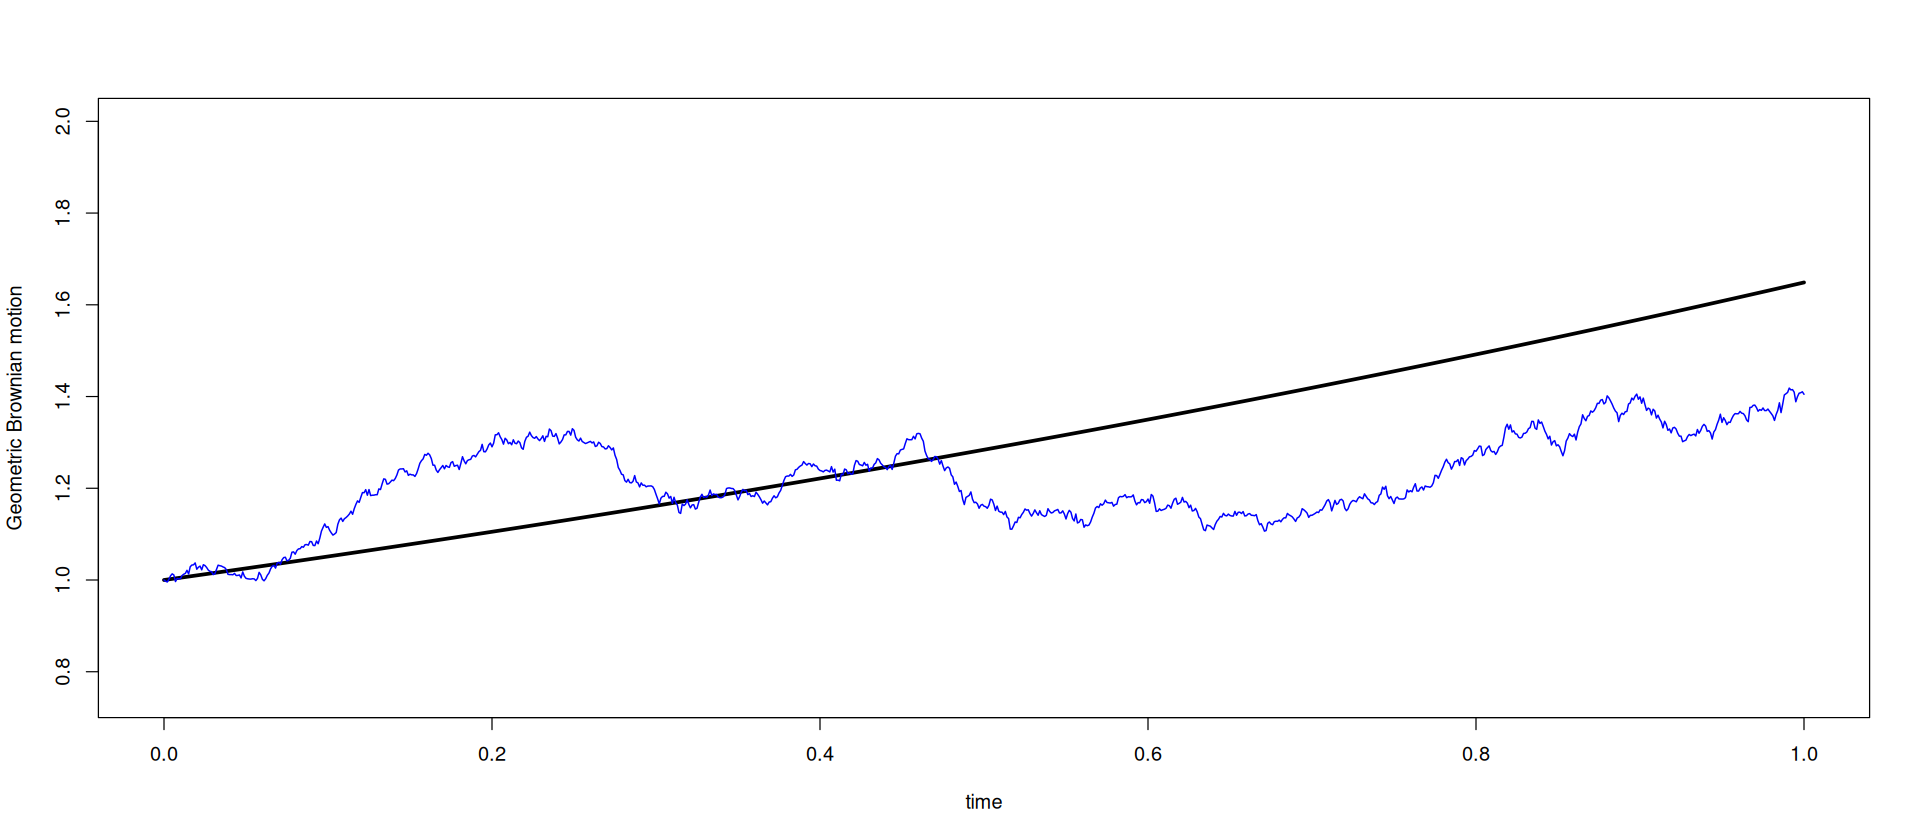

In [8]:
N=1000; t<- 0:N; dt<- 1.0/N; sigma=.2; mu=.5; Z<- rnorm(N,mean=0,sd=sqrt(dt));
plot(t*dt, exp(mu*t*dt), xlab= "time", ylab= "Geometric Brownian motion", type= "l", ylim=
c(.75,2), col= 1,lwd=3)
lines(t*dt, exp(sigma*c(0,cumsum(Z))+mu*t*dt-sigma*sigma*t*dt/2),xlab= "time",type=
"l",ylim=c(0, 4), col= 'blue', lwd=1.2, xaxs='i', yaxs='i')

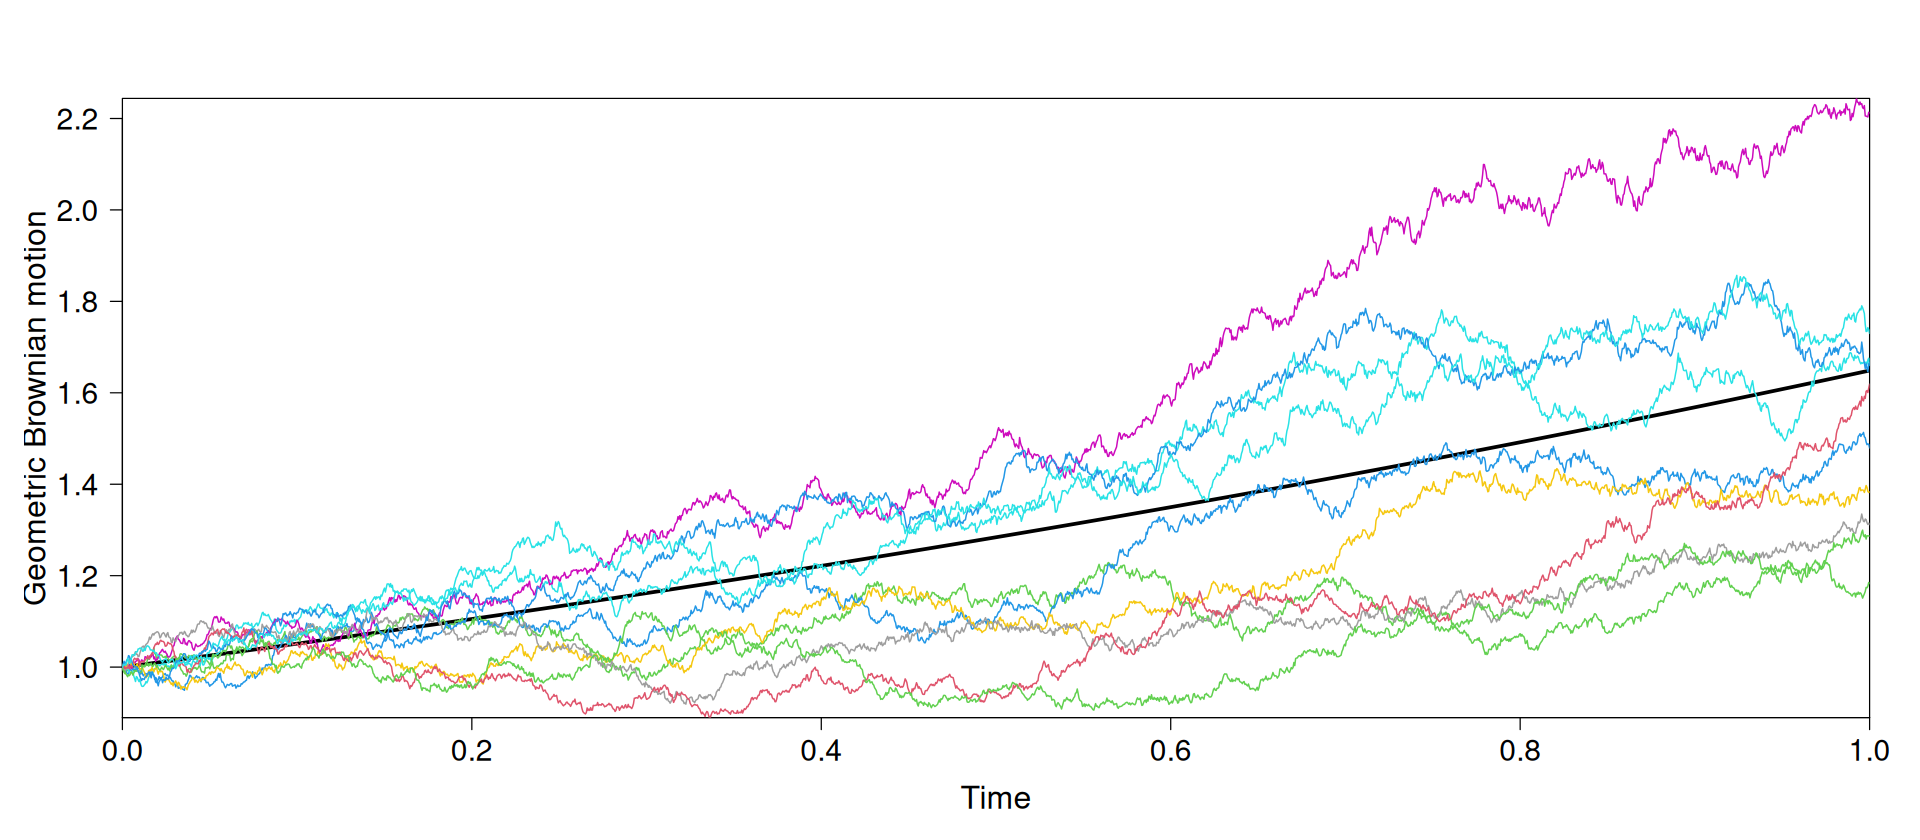

In [9]:
N=2000; t<- 0:N; dt<- 1.0/N; mu=.5;sigma=.2; nsim<- 10; par(oma=c(0,1,0,0))
X<- matrix(rnorm(nsim*N,mean=0,sd=sqrt(dt)), nsim, N)
X<- cbind(rep(0, nsim), t(apply(X, 1, cumsum)))
for (i in 1:nsim){X[i,]<- exp(mu*t*dt+sigma*X[i,]-sigma*sigma*t*dt/2)}
plot(t*dt, exp(mu*t*dt), xlab= "Time", ylab= "Geometric Brownian motion", lwd=3, ylim=
c(min(X),max(X)), type= "l", col= 1,las=1,cex.axis=1.5,cex.lab=1.6, xaxs='i', yaxs='i')
for (i in 1:nsim){lines(t*dt, X[i, ], lwd=1.2, type= "l", col= 2+i%%7)}

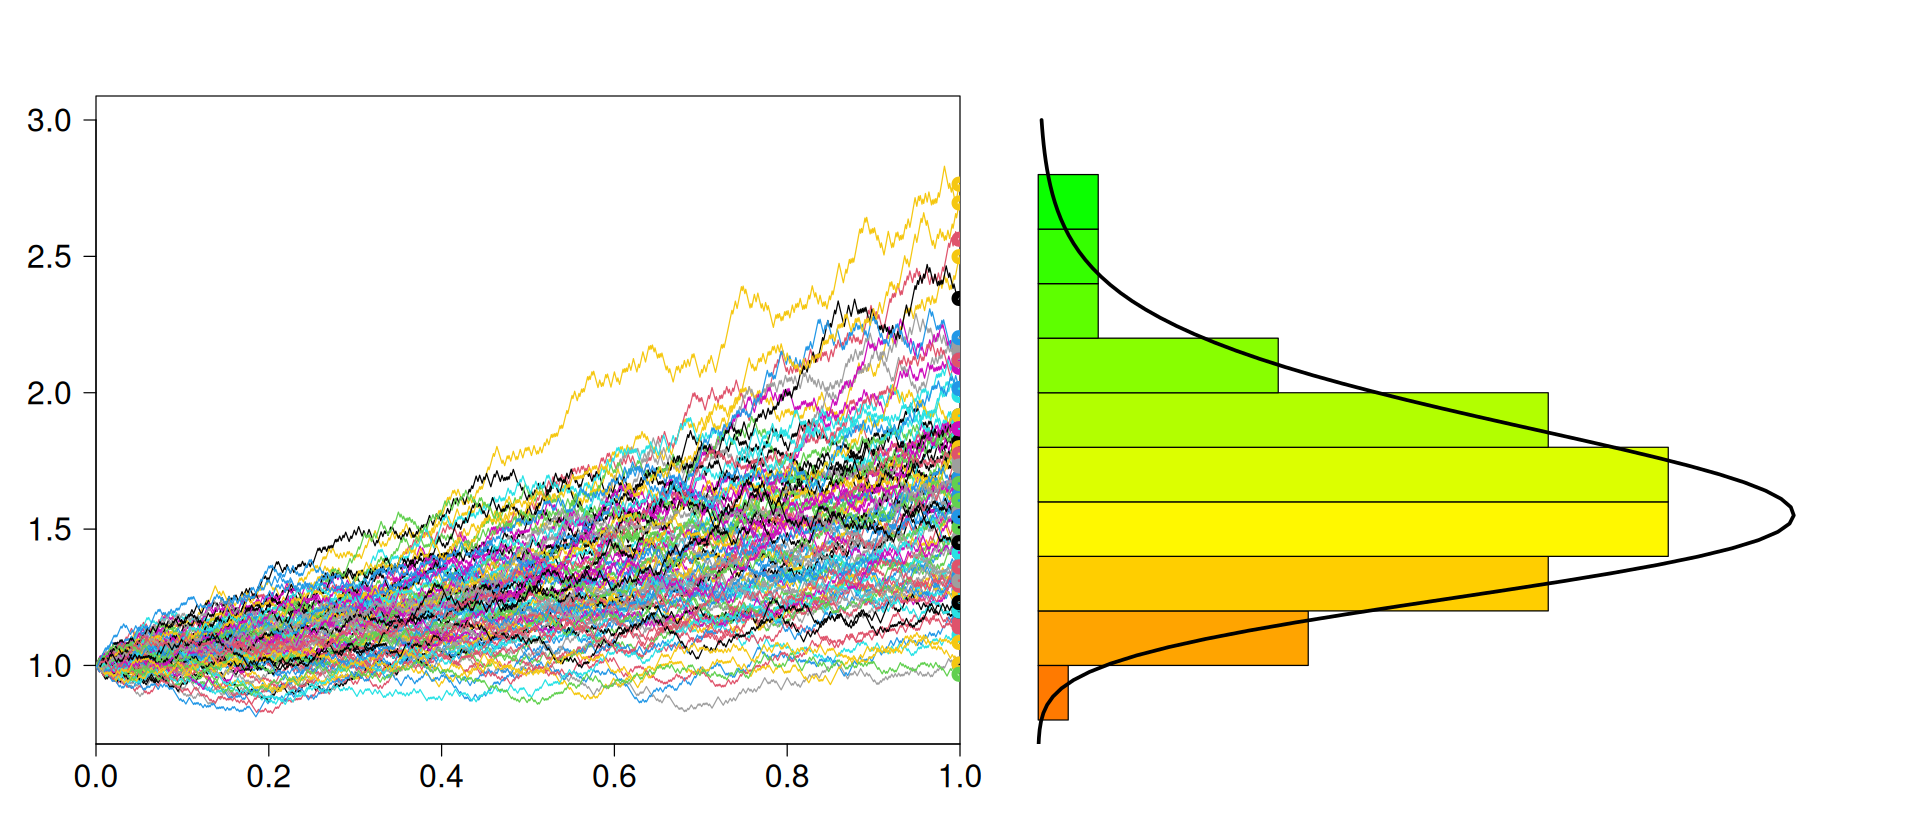

In [10]:
N=1000; t<- 0:N; dt<- 1.0/N; ns<- 100 # using Bernoulli samples
sigma=.2;r=.5;a=(1+r*dt)*(1-sigma*sqrt(dt))-1;b=(1+r*dt)*(1+sigma*sqrt(dt))-1
X<- matrix(a+(b-a)*rbinom( ns * N, 1,.5), ns, N); # dev.new(width=16,height=7);
X<-cbind(rep(0,ns),t(apply((1+X),1,cumprod))); X[,1]=1;H<-hist(X[,N],plot=FALSE);
layout(matrix(c(1,2), nrow=1, byrow= TRUE)); par(mar=c(2,2,2,0), oma= c(2, 2, 2, 2))
plot(t*dt,X[1,],xlab="time",ylab="",type="l",ylim=c(.8,3),col= 0,xaxs='i',las=1,cex.axis=1.6)
for (i in 1:ns){lines(t*dt,X[i,],xlab="time",type="l",col=i)};pl=rainbow(20,start=.08,end=.6)
lines((1+r*dt)^t, type="l", lty=1, lwd=3,xlab="",ylab="", main="")
for (i in 1:ns){points(.999, X[i,N], pch=1, lwd= 5, col= i)}; x<- seq(.01,3, length=100);
px<- exp(-(-(r-sigma^2/2)+log(x))^2/2/sigma^2)/x/sigma/sqrt(2*pi); par(mar= c(2,2,2,2))
plot(NULL , xlab="", ylab="", xlim= c(0, max(px,H$density)),ylim=c(.8,3),axes=F, las=1)
rect(0, H$breaks[1:(length(H$breaks) - 1)], col=pl, H$density, H$breaks[2:length(H$breaks)])
lines(px,x, type="l", lty=1, lwd=3,xlab="",ylab="", main="")

[1] "0005.HK"

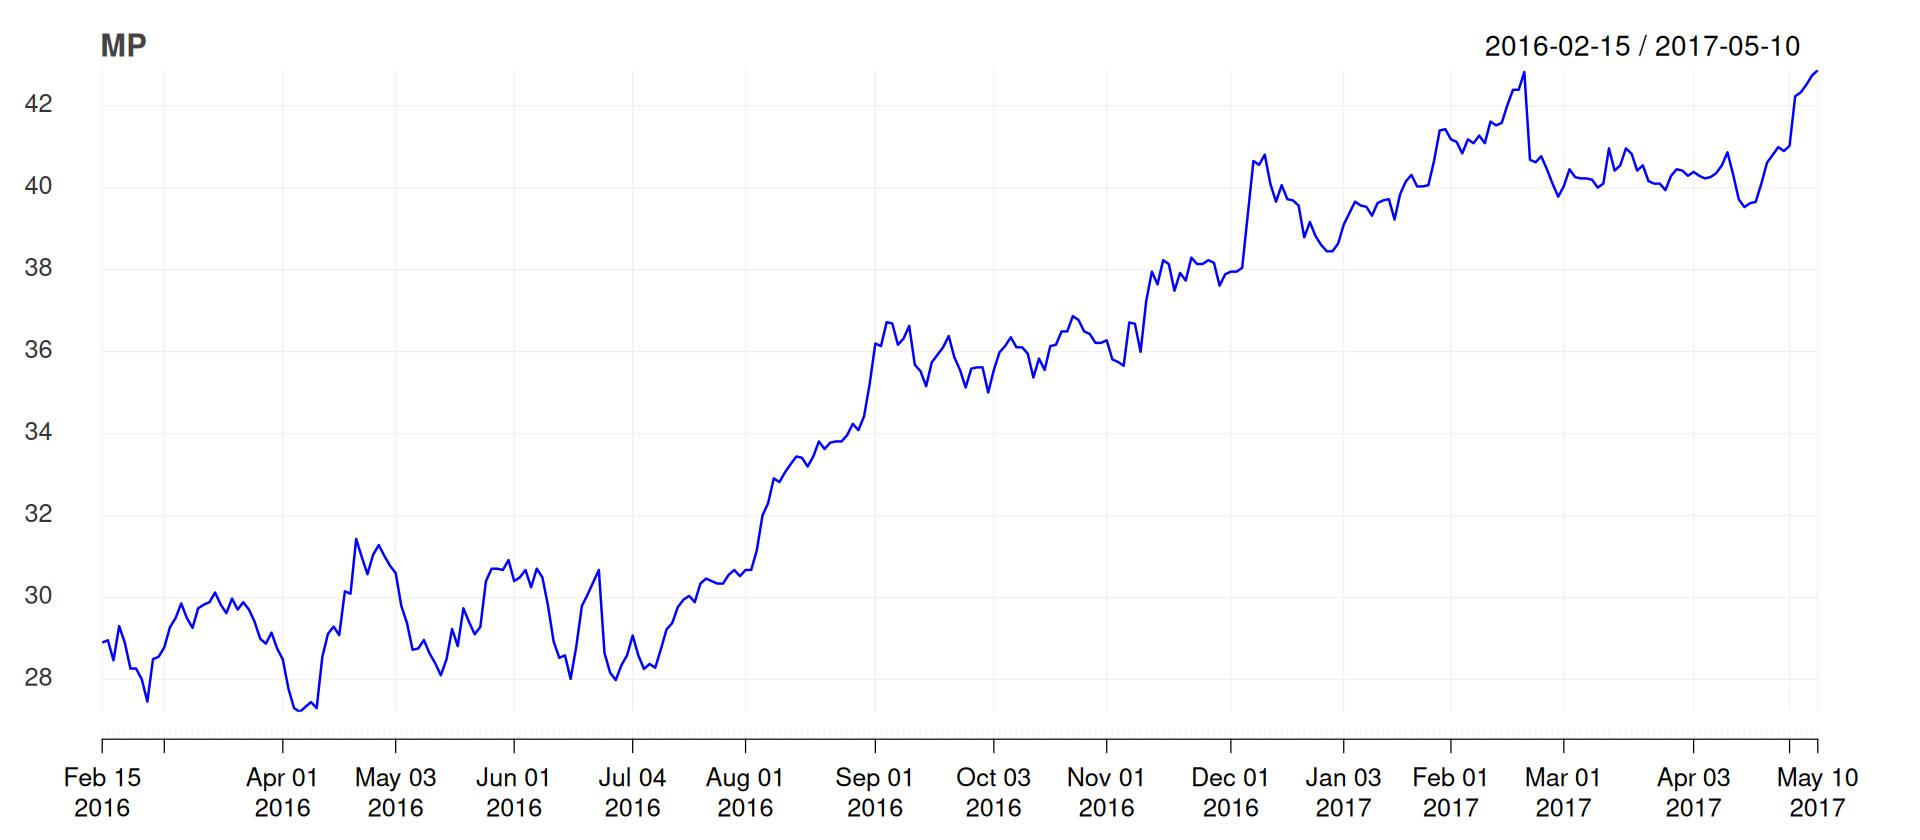

In [11]:
library(quantmod);getSymbols("0005.HK",from="2016-02-15",to="2017-05-11",src="yahoo")
MP=Ad(`0005.HK`);r=(MP-lag(MP))/lag(MP);mu=mean(r[-1]);s=sd(r[-1]);N=length(MP);
X=matrix(mu+s*rnorm(N-1)/2,1);X=as.numeric(MP[1])*cbind(0,t(apply(1+X,1, cumprod)));
X[,1]=MP[1];GBM=xts(X[1,],index(MP));pars=chart_pars();pars$cex=1.4;th=chart_theme();
th$col$line.col="blue"; th$rylab=FALSE; chart_Series(MP, pars=pars, theme=th);
ddexp=xts(as.numeric(MP[1])*exp(mu*seq_len(N)),index(MP));dev.new(width=16,height=8);
par(mfrow=c(1,2)); add_TA(exp(log(ddexp)), on=1, lwd=4, legend=NULL)
g=chart_Series(GBM,pars=pars,theme=th);yl=g$get_ylim();g$set_ylim(yl);
g=add_TA(exp(log(ddexp)),on=1,lwd=4);yl[[2]]=structure(range(MP),fixed=TRUE);g

In [12]:
# install.packages("Sim.DiffProc")
library("Sim.DiffProc");
fx<- expression( theta[1]*x ); gx<- expression( theta[2]*x )
fitsde(data=as.ts(MP),drift=fx,diffusion=gx,start=list(theta1=.01, theta2=.01), pmle="euler")

Package 'Sim.DiffProc', version 4.8
browseVignettes('Sim.DiffProc') for more informations.




Call:
function (name, ...)  .Primitive("call")

Coefficients:
     theta1      theta2 
0.001359778 0.013362221 

[1] "GSPC"

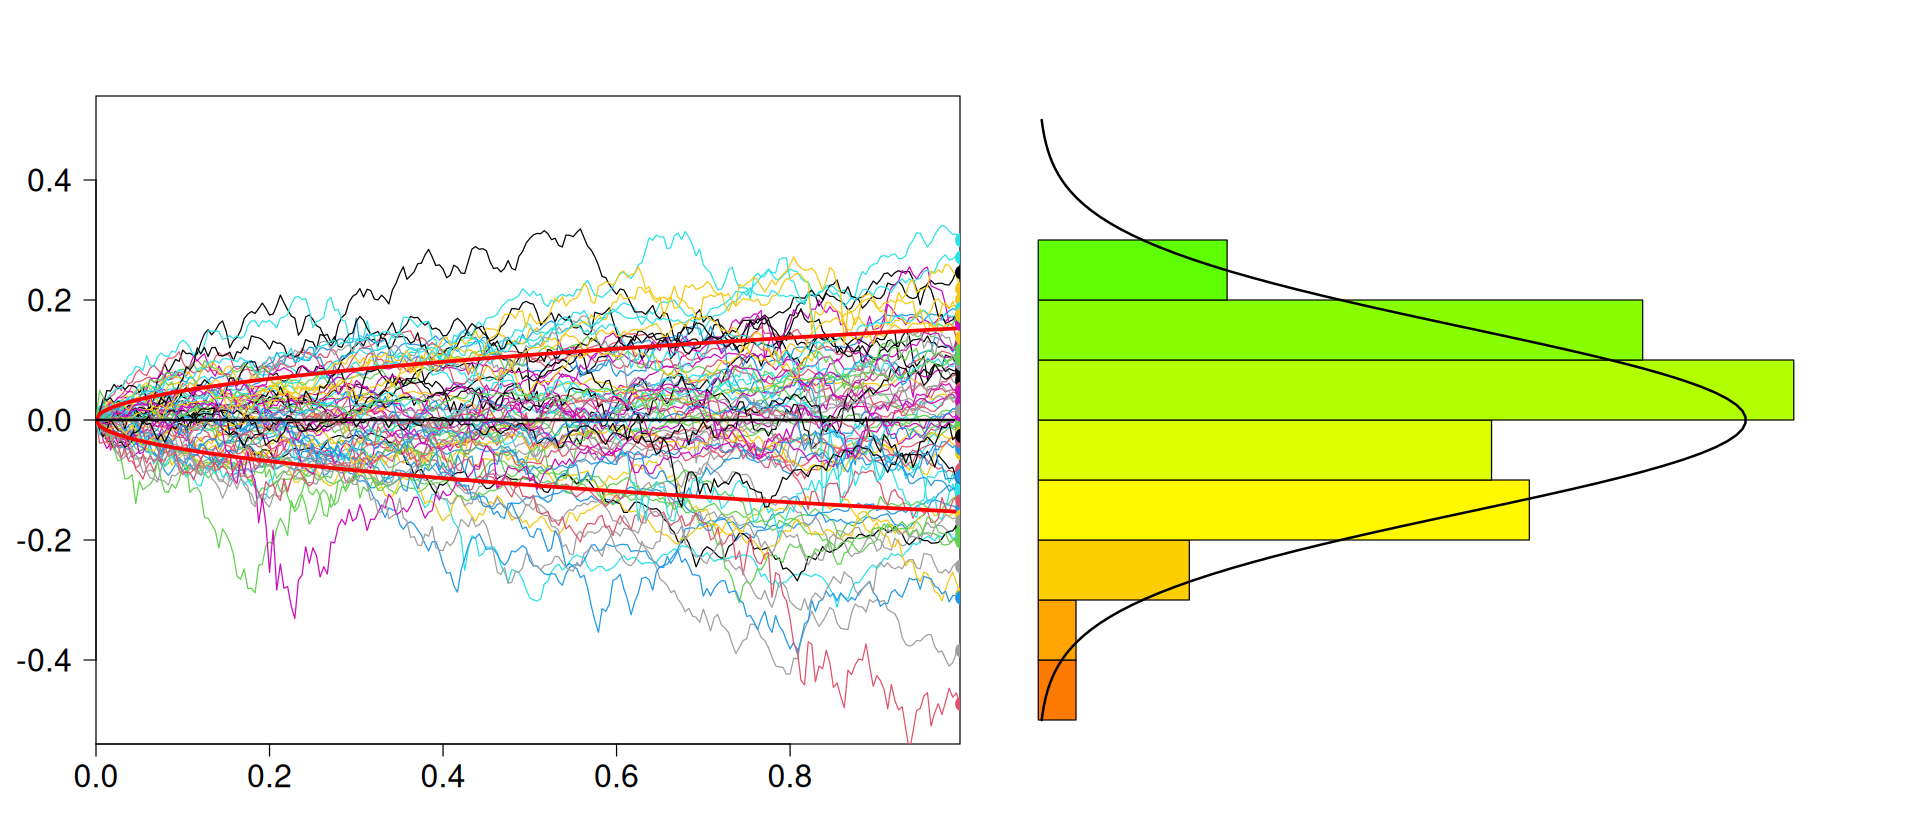

In [13]:
library(quantmod);getSymbols("^GSPC",from="1950-01-01",to="2022-12-31",src="yahoo")
stock=Cl(`GSPC`);s=0;y=0;j=0;ct=0;N=240;nsim=72;X=matrix(0,nsim,N)
for (i in 1:nrow(GSPC)){if (s==0 && grepl('-01-0',index(stock[i]))) {if (ct==0 || X[y,N]>0)
{y=y+1;j=1;s=1;ct=ct+1;}};if (j<=N) {X[y,j]=as.numeric(stock[i]);}
if (grepl('-02-0',index(stock[i]))) {s=0;};j=j+1};t=0:(N-1);dt=1/N; # dev.new(width=16,height=7);
layout(t(1:2));par(mar=c(2,2,2,0),oma=c(2,2,2,2));m=mean(X[,N]/X[,1]-1);sg=sd(X[,N]/X[,1]-1)
plot(t*dt,X[1,]/X[1,1]-1-m*t*dt,xlab='',ylab='',type='l',ylim=c(-.5,.5),col=0,xaxs='i',las=1,
cex.axis=1.6);for (i in 1:nsim){lines(t*dt,X[i,]/X[i,1]-1-m*t*dt,type='l',col=i)}
lines(t*dt,sg*sqrt(t*dt),lty=1,col="red",lwd=3);lines(t*dt,-sg*sqrt(t*dt),lty=1,col="red",lwd=3)
lines(t*dt,0*t,lty=1,col='black',lwd=2);x=seq(-.5,.5,l=100);px=dnorm(x,0,sg);
for (i in 1:nsim){points(.999,X[i,N]/X[i,1]-1-m*N*dt,pch=1,lwd=5,col=i)}
par(mar=c(2,2,2,2)); H=hist(X[,N]/X[,1]-1-m*N*dt,plot=F);
plot(NULL,xlab='',ylab='',xlim=c(0,max(px,H$density)),ylim=c(-.5,.5),axes=F)
rect(0,H$breaks[-length(H$breaks)],col=rainbow(20,start=.08,end=.6),H$density,H$breaks[-1])
lines(px,x,lty=1,col='black',lwd=2)

Warning message:
“^STI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "STI"

[1] "DJI"

[1] 0.0143658

[1] 0.001635132

[1] 0.002699796

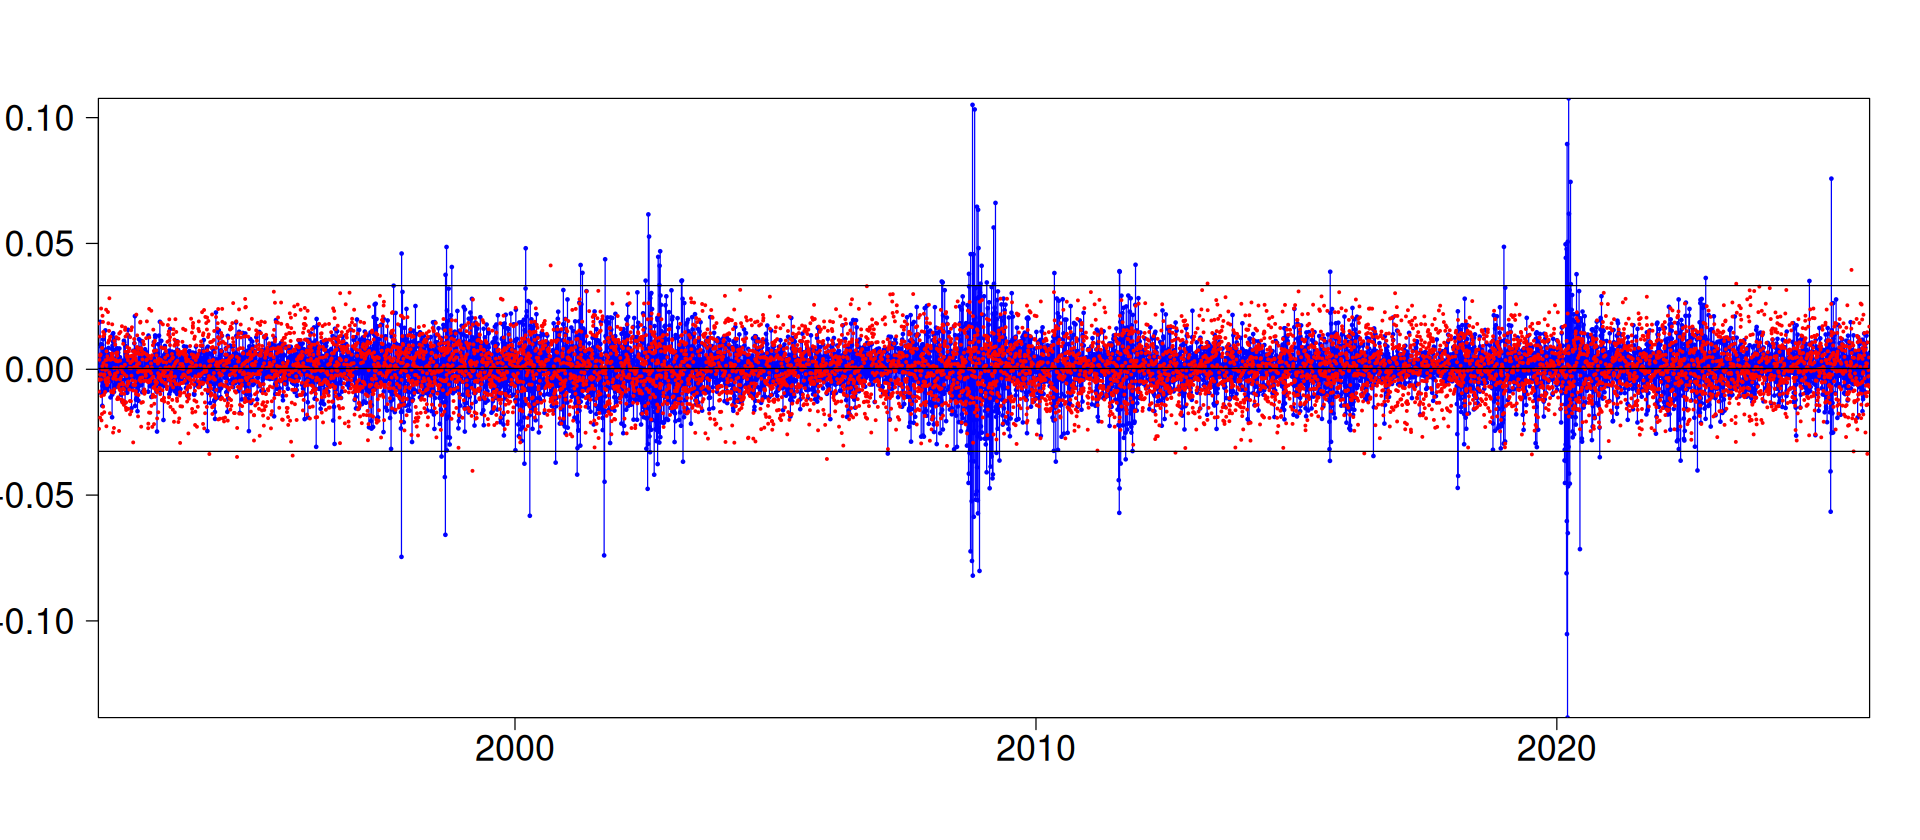

In [14]:
library(quantmod); # dev.new(width=16,height=8)
getSymbols("^STI",from="1990-01-03",to="2015-01-03",src="yahoo");stock=Ad(`STI`);
getSymbols("^DJI",from="1990-01-03",to=Sys.Date(),src="yahoo");stock=Ad(`DJI`);
stk.rtn=diff(log(stock));rt<-as.vector(stk.rtn);m=mean(rt,na.rm=TRUE);s=sd(rt,na.rm=TRUE);
ts=index(stk.rtn);n=sum(is.na(rt))+sum(!is.na(rt));x=seq(1,n);y=rnorm(n,mean=m,sd=s)
plot(ts,rt,pch=19,xaxs="i",yaxs="i",cex=.03,col="blue", ylab="", xlab="", main='', las=1,
cex.lab=1.8, cex.axis=1.8, lwd=3)
segments(x0=ts,x1=ts,y0=0,y1=rt,col="blue");points(ts,y,pch=19,cex=.3,col="red")
abline(h=m+3*s, lwd=1);abline(h=m, lwd=1);length(rt[abs(rt-m)>3*s])/length(stk.rtn);
length(y[abs(y-m)>3*s])/length(y);2*(1-pnorm(3*s,0,s)); abline(h=m-3*s, lwd=1)

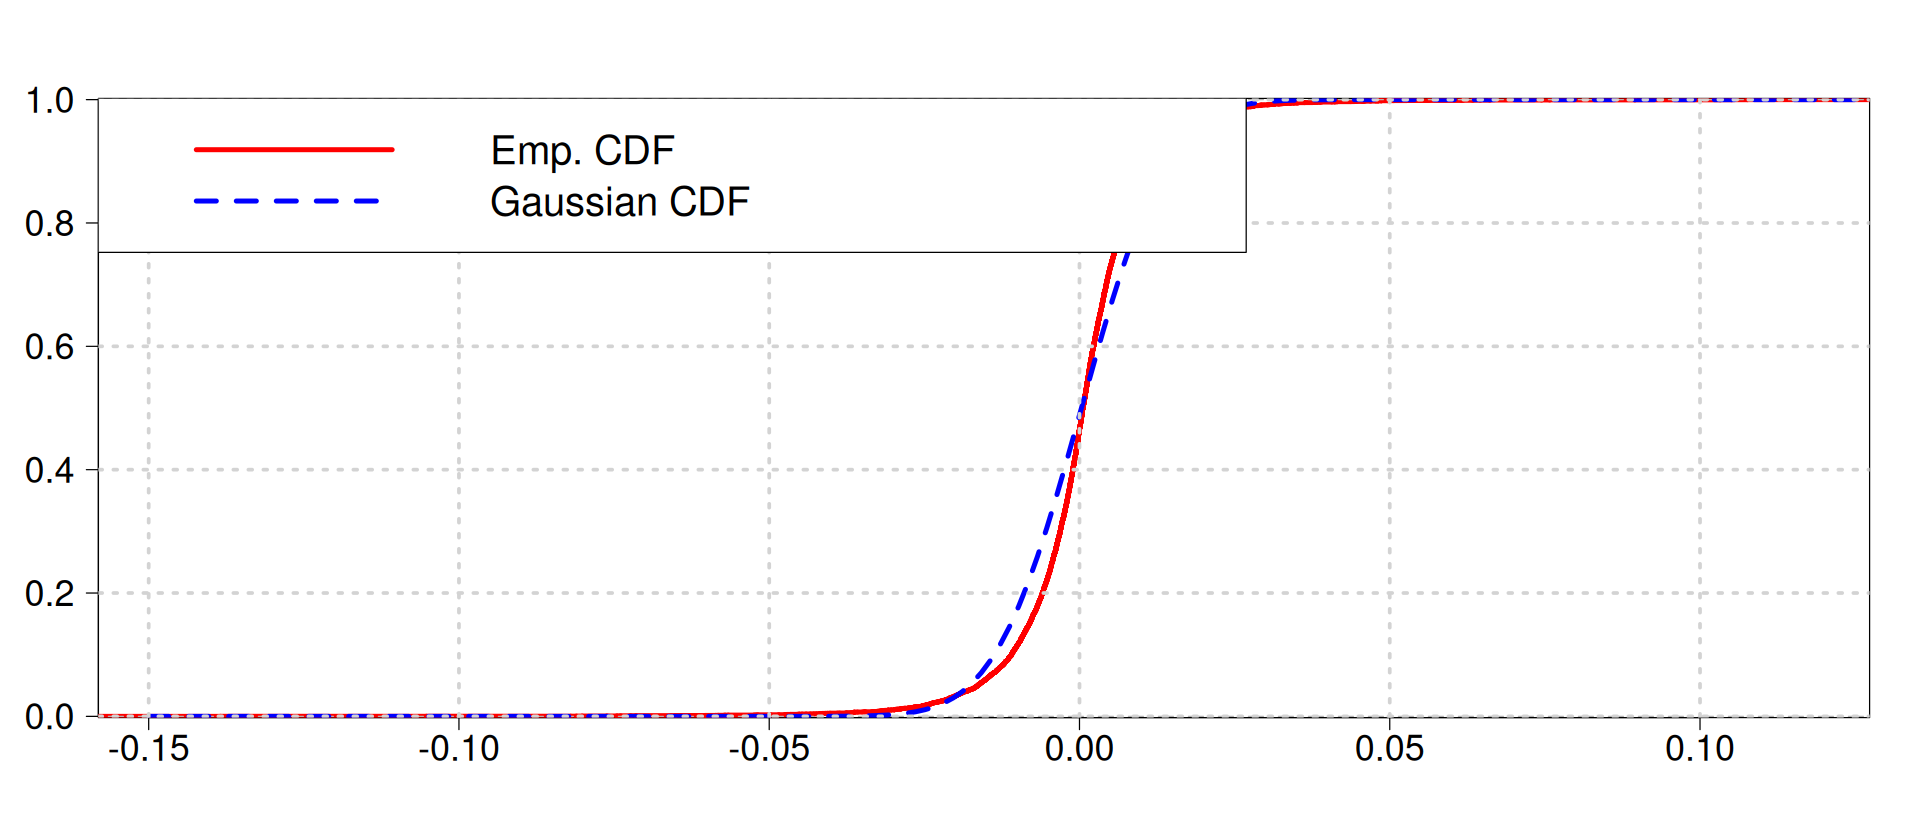

In [16]:
stock.ecdf=ecdf(as.vector(stk.rtn)); x<- seq(-.15,.15, length=200); px<- pnorm((x-m)/s); # dev.new(width=16,height=8)
plot(stock.ecdf, xlab= '', col="red",ylab= '', ylim=c(-.002,1.002),
main= '', xaxs="i", yaxs="i", las=1, cex.lab=1.8, cex.axis=1.8, lwd=4)
lines(x, px, type="l", lty=2, col="blue",xlab="",ylab="", main="", lwd=4); grid(lwd= 3)
legend("topleft",c("Emp. CDF","Gaussian CDF"),col=c("red","blue"),lty=1:2,cex=2,lwd=4)

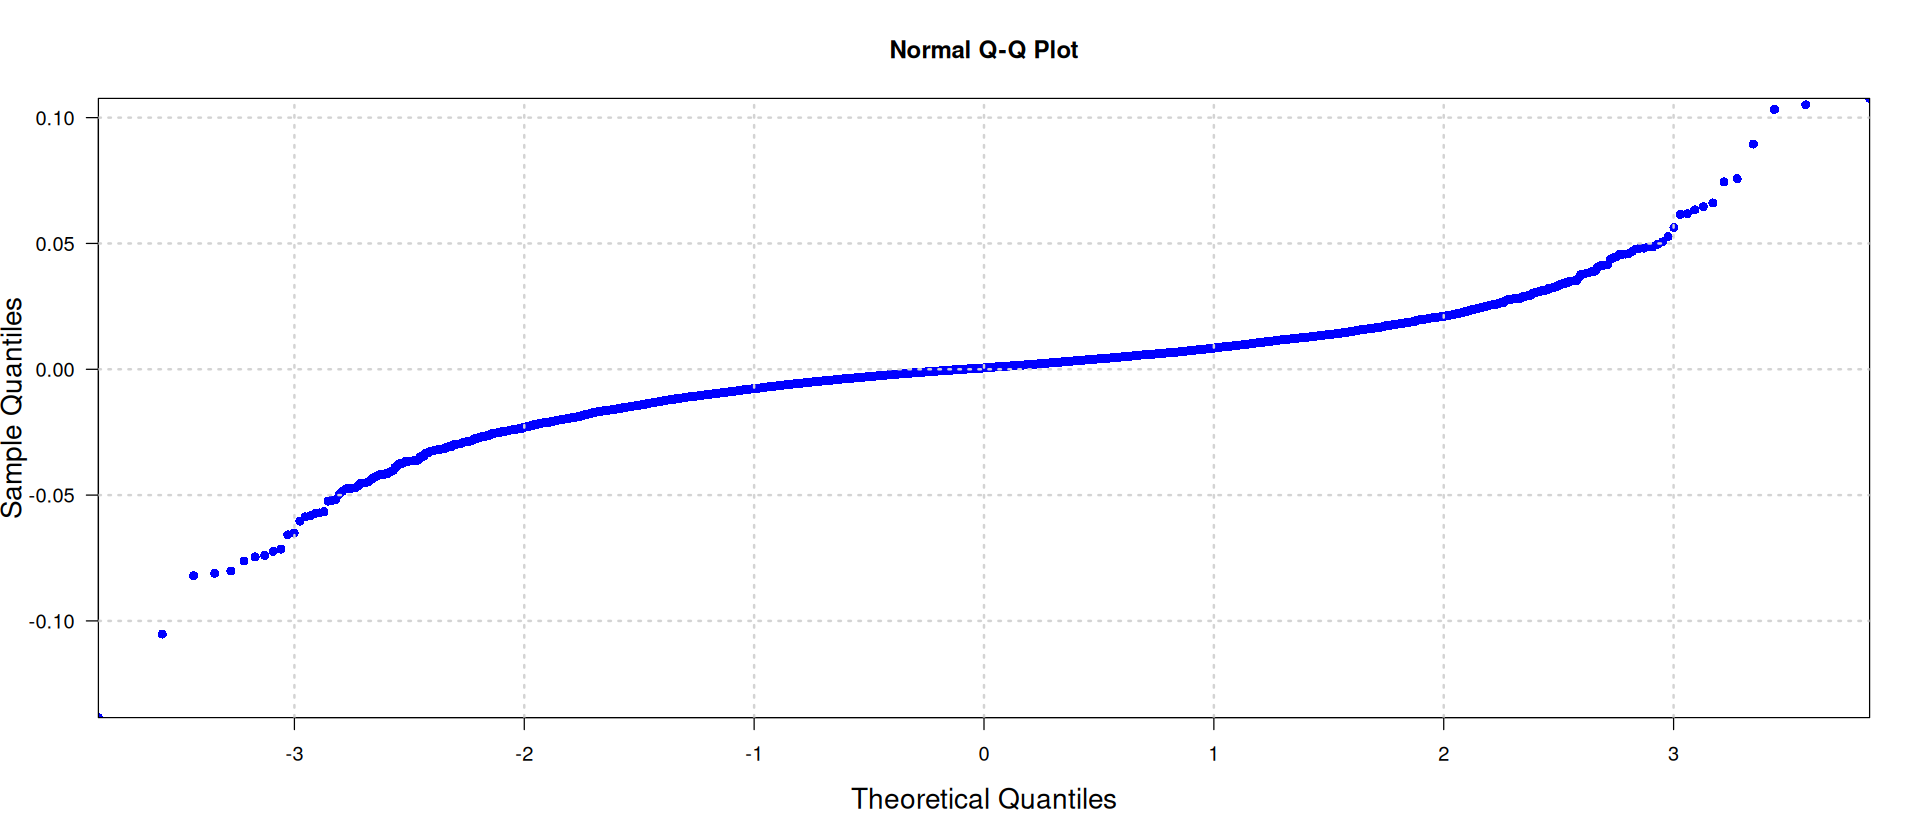

In [17]:
# dev.new(width=16,height=8)
qqnorm(stk.rtn,col='blue',xaxs="i",yaxs="i",las=1,cex.lab=1.4,cex.axis=1,pch=16);grid(lwd=2)

In [18]:
n= sum(is.na(stk.rtn))+sum(!is.na(stk.rtn));x=seq(1,n);y=rnorm(n,mean=m,sd=s)
ks.test(y,"pnorm",mean=m,sd=s); ks.test(stk.rtn,"pnorm",mean=m,sd=s)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  y
D = 0.010474, p-value = 0.3045
alternative hypothesis: two-sided


Warning message in ks.test.default(stk.rtn, "pnorm", mean = m, sd = s):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  stk.rtn
D = 0.97816, p-value < 2.2e-16
alternative hypothesis: two-sided


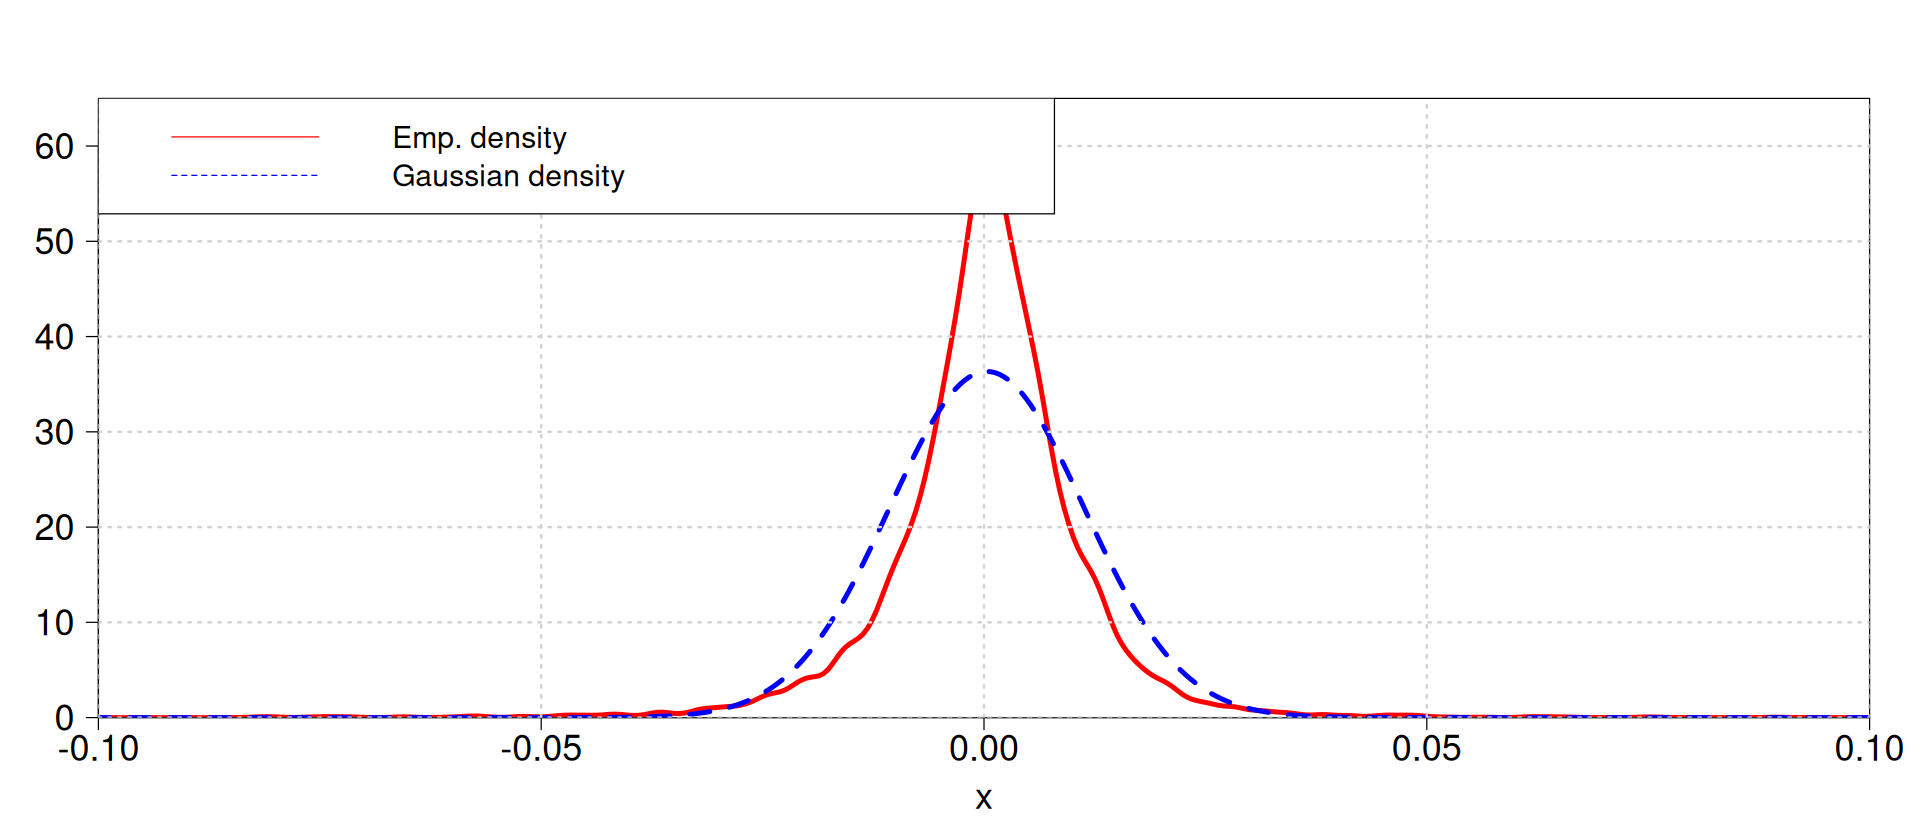

In [19]:
# dev.new(width=16,height=8); 
x<- seq(-.25,.25, length=1000); qx<- dnorm(x,mean=m,sd=s)
stk.dens=density(stk.rtn,na.rm=TRUE)
plot(stk.dens, xlab= 'x', lwd=4, col="red",ylab= '', main= '', xlim=c(-.1,.1), ylim=c(0,65),
xaxs="i", yaxs="i", las=1, cex.lab=1.8, cex.axis=1.8)
lines(x, qx, type="l", lty=2, lwd=4, col="blue",xlab='',ylab='',main=''); grid(lwd=2)
legend("topleft",c("Emp. density","Gaussian density"),col=c("red","blue"),lty=1:2,cex=1.5)

[1] "GSPC"

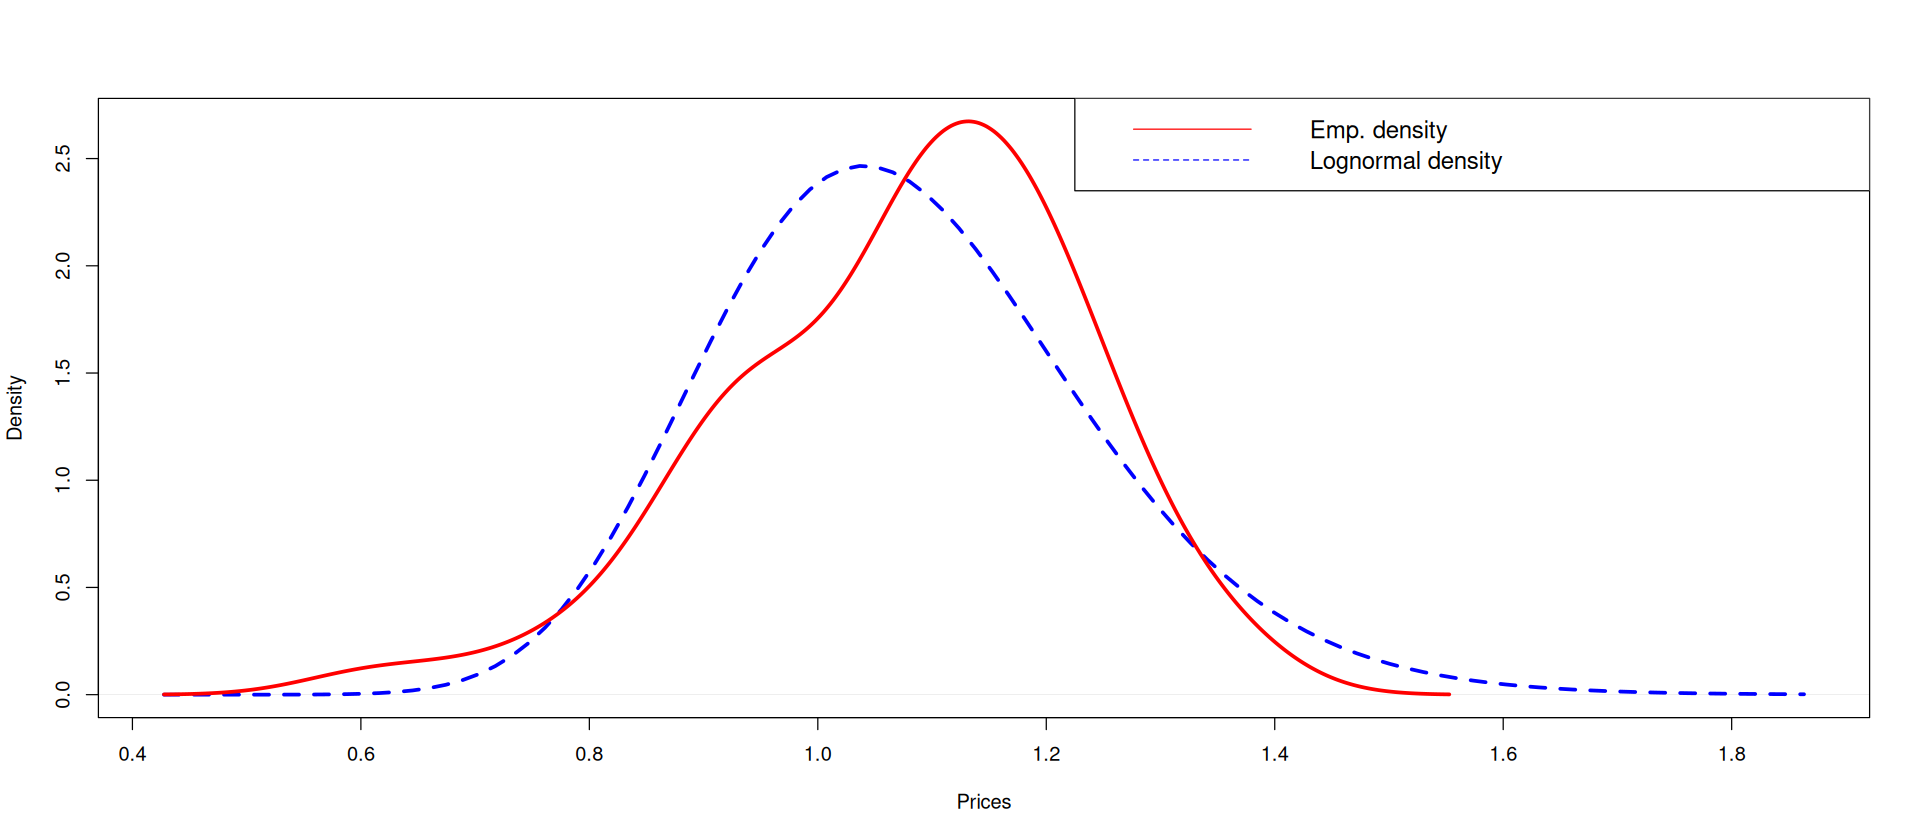

In [21]:
library(quantmod); getSymbols("^GSPC",from="1950-01-01",to="2022-12-31",src="yahoo")
stock<-Cl(`GSPC`); s=0;y=0;j=0;ct=0;N=240;nsim=72; X= matrix(0, nsim, N);
for (i in 1:nrow(GSPC)){if (s==0 && grepl('-01-0',index(stock[i]))) {if (ct==0 || X[y,N]>0)
{y=y+1;j=1;s=1;ct=ct+1;}}
if (j<=N) {X[y,j]=as.numeric(stock[i]);};if (grepl('-02-0',index(stock[i]))) {s=0;};j=j+1;}
t<- 0:(N-1); dt<- 1.0/N; stock=X[,N]/X[,1];stk.dens=density(stock,na.rm=TRUE)
x<- seq(min(stk.dens$x), 1.2*max(stk.dens$x), length=100); # dev.new(width=10, height=5)
qx<- dlnorm(x,mean=mean(log(stock)), sd=sd(log(stock)))
plot(x,qx,type="l",lty=2,lwd=3,col="blue",xlab="Prices",ylim=c(0,max(stk.dens$y)),
ylab="Density", main="", panel.first= abline(h=0,col='grey',lwd=.2))
lines(stk.dens,xlab='x',lwd=3,col="red",ylab='',main='',las=1,cex.axis=1,cex.lab=1,
xaxs='i',yaxs='i')
legend("topright",c("Emp. density","Lognormal density"),col=c("red", "blue"),lty=1:2,cex=1.2)


Attaching package: ‘pracma’


The following object is masked from ‘package:Sim.DiffProc’:

    Mode




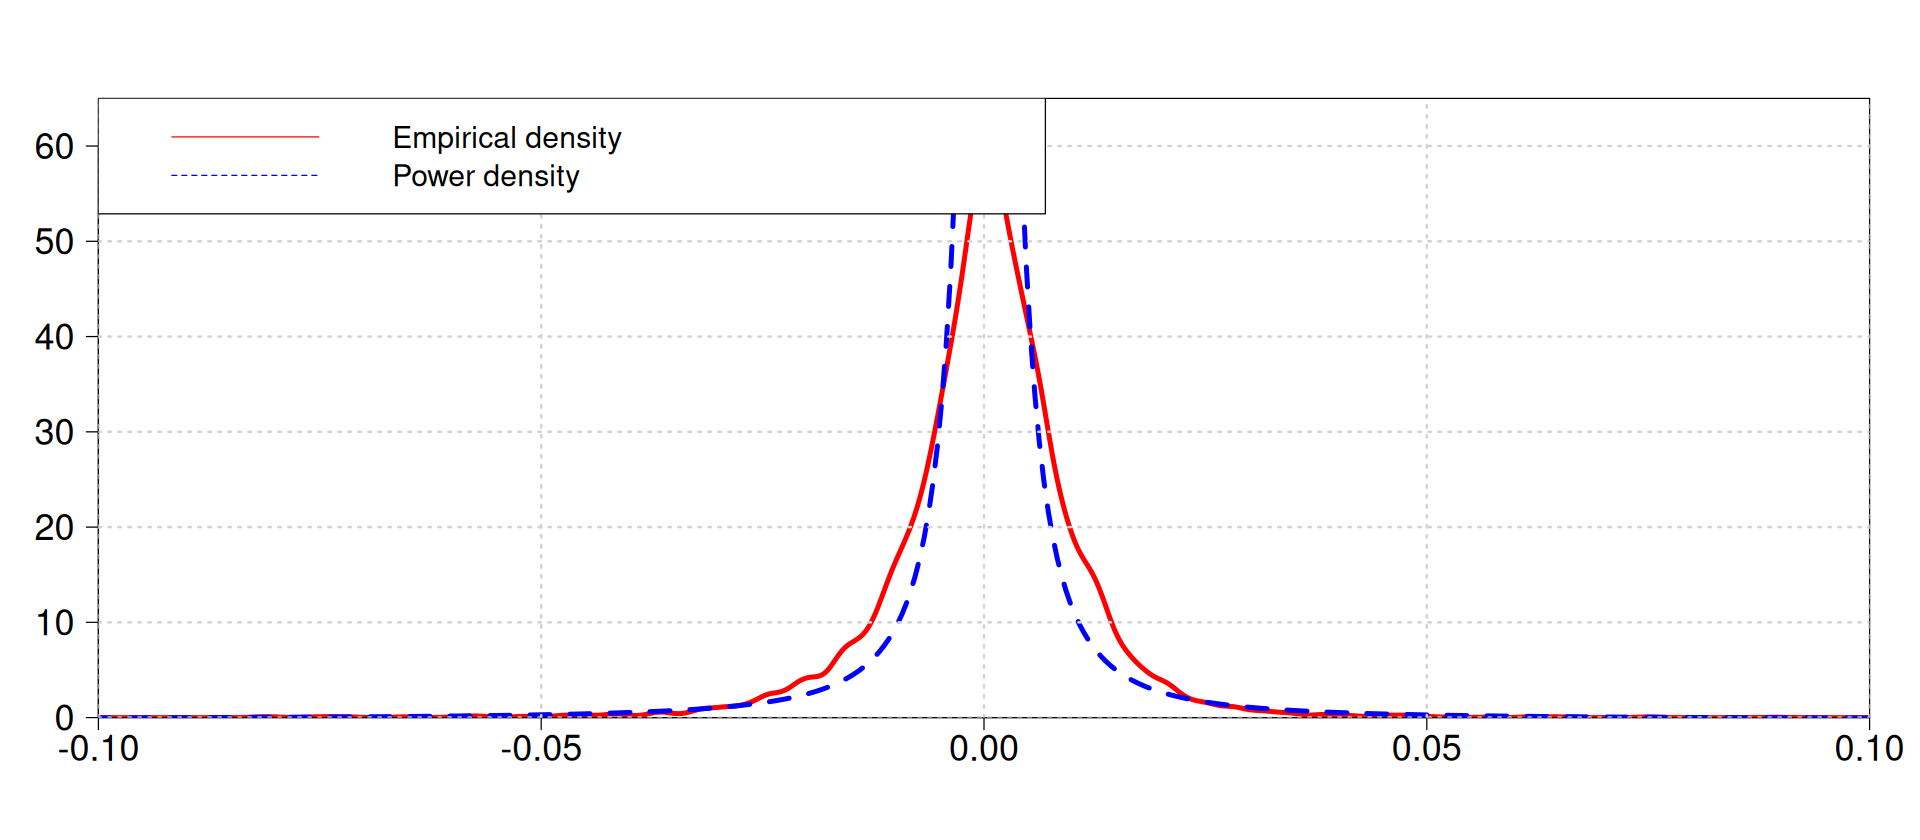

In [22]:
# install.packages("pracma"); 
library(pracma); x<- seq(-.25,.25, length=1000)
stk.dens=density(stk.rtn,na.rm=TRUE, from=-.1, to=.1, n= 1000)
a<-rationalfit(stk.dens$x,stk.dens$y, d1=2, d2=2); # dev.new(width=16,height=8)
plot(stk.dens$x,stk.dens$y, lwd=4, type= "l",xlab= '', col="red",ylab= '', main= '',
xlim=c(-.1,.1), ylim=c(0,65), xaxs="i", yaxs="i", las=1, cex.lab=1.8, cex.axis=1.8)
lines(x,(a$p1[3]+a$p1[2]*x+a$p1[1]*x^2)/(a$p2[3]+a$p2[2]*x+a$p2[1]*x^2),
type="l",lty=2,col="blue",xlab="x value",lwd=4, ylab="Density",main=""); grid(lwd= 2)
legend("topleft",c("Empirical density", "Power density"),col=c("red", "blue"), lty=1:2, cex=1.5)

[1] "DJI"

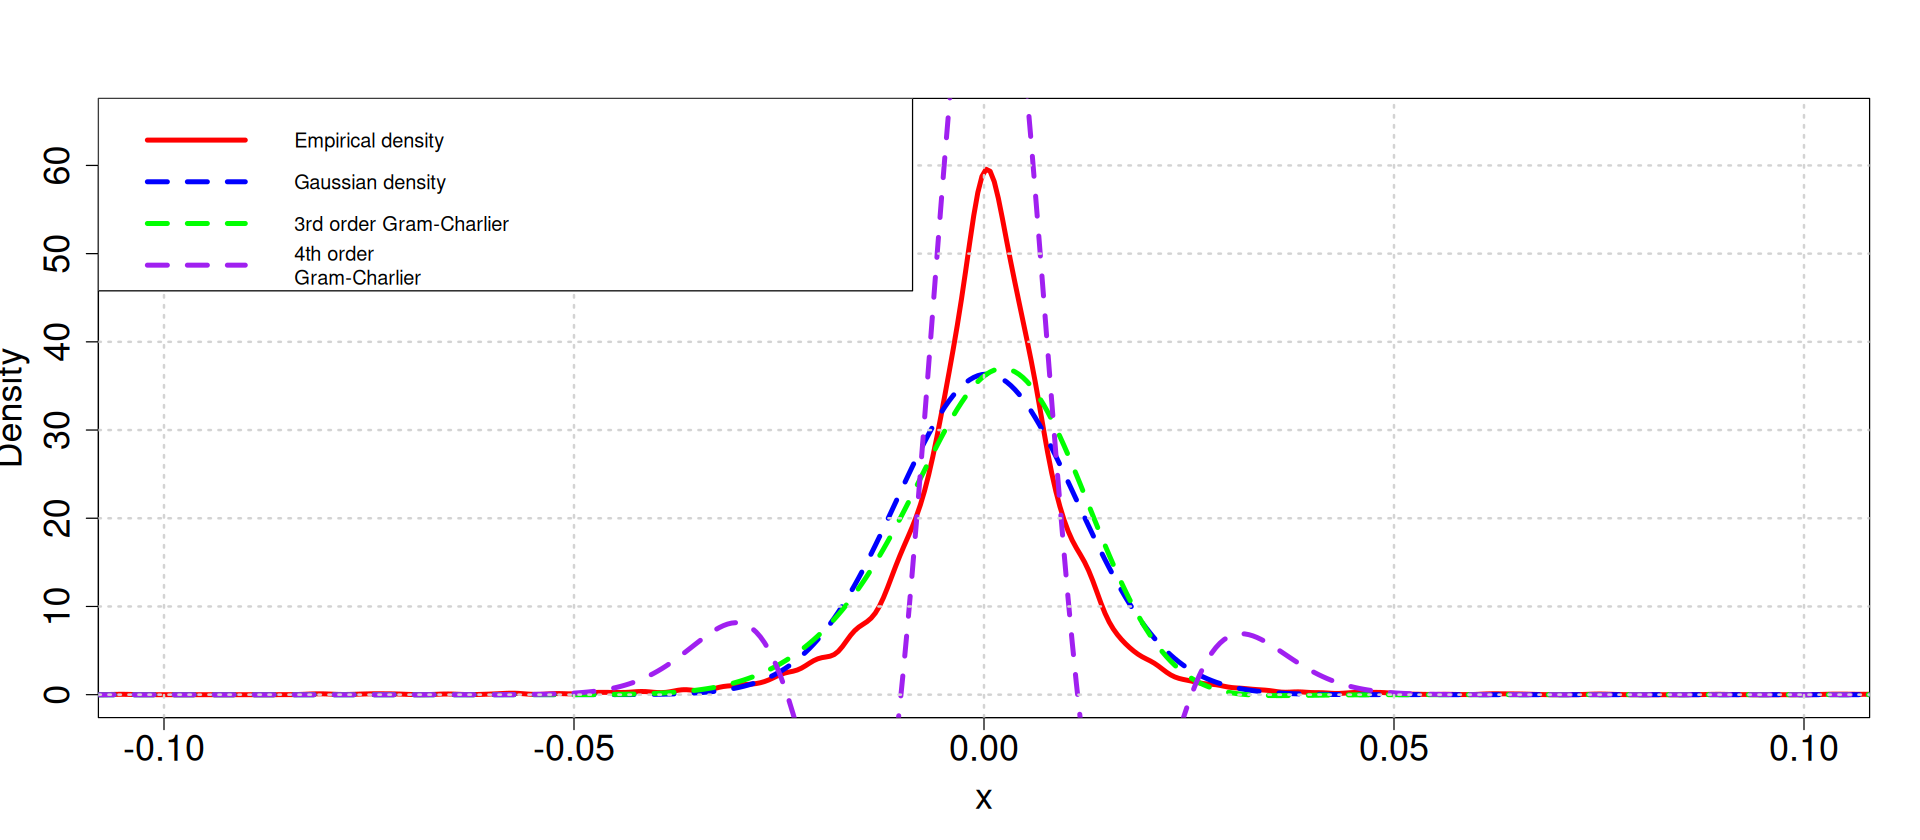

In [24]:
library(quantmod); getSymbols("^DJI", from= "1990-01-03", to= Sys.Date(), src= "yahoo")
stock=Ad(DJI); stock_rtn=diff(log(stock)); data=as.vector(na.omit(stock_rtn))
m=mean(data); s=sd(data); dens=density(data); # dev.new(width= 16, height= 8)
x=seq(-.25,.25, length.out= 1000); y_emp=approx(dens$x, dens$y, xout= x)$y
y_gauss=dnorm(x, mean= m, sd= s); mu3=mean((data - m)^3); mu4=mean((data - m)^4)
z=(x-m)/s;c3=mu3/(6*s^3);c4=(mu4-3*s^4)/(24*s^4);g<-dnorm(x,m,s)
d3=g*(1+c3*(z^3-3*z)); d4=g*(1+c3*(z^3-3*z)+c4*(z^4-6*z^2+3))
plot(x, y_emp, type= 'l', lwd= 4, col= "red", xlab= 'x', ylab= 'Density', xlim= c(-.1,.1),
ylim=c(0, 65), cex.lab= 1.8, cex.axis= 1.8)
lines(x, y_gauss, lty= 2, lwd= 4, col= "blue"); lines(x, d3, lty= 2, lwd= 4, col= "green")
lines(x, d4, lty= 2, lwd= 4, col= "purple"); grid(lwd= 2)
legend("topleft",c("Empirical density","Gaussian density", "3rd order Gram-Charlier","4th order
Gram-Charlier"),col=c("red","blue","green","purple"),lty=c(1,2,2,2),lwd=4,cex=1.)

[1] "DJI"

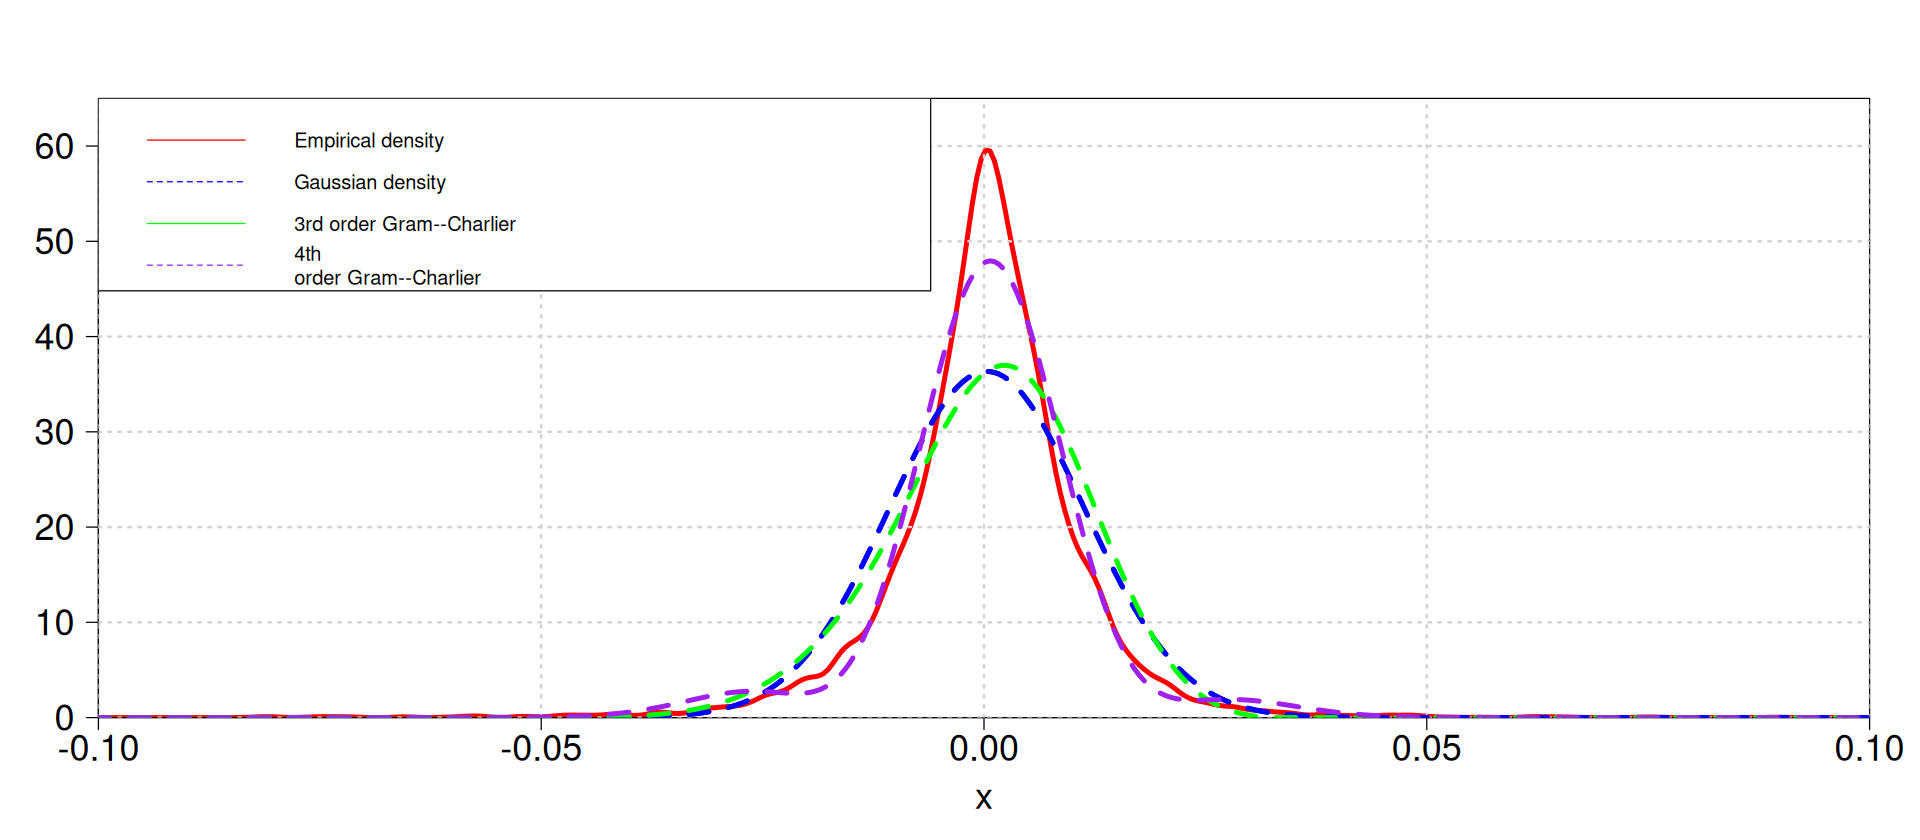

In [28]:
# install.packages("SimMultiCorrData");install.packages("PDQutils")
library(SimMultiCorrData);library(PDQutils); library(quantmod)
getSymbols("^DJI",from="1990-01-03",to=Sys.Date(),src="yahoo");stock=Ad(`DJI`);
stk.rtn=diff(log(stock)); returns<- as.vector(stk.rtn);stk.dens=density(stk.rtn,na.rm=TRUE); # dev.new(width=16,height=8);m<-calc_moments(returns[!is.na(returns)])
x<- stk.dens$x; qx<- dnorm(x,mean=m[1],sd=m[2])
plot(x,stk.dens$y, xlab= 'x', type= 'l', lwd=4, col="red",ylab= '', main= '', xlim= c(-.1,.1),
ylim=c(0,65), xaxs="i", yaxs="i", las=1, cex.lab=1.8, cex.axis=1.8)
grid(lwd= 2); lines(x, qx, type="l", lty=2, lwd=4, col="blue")
cumulants<-c(m[1],m[2]**2); d2<- dapx_edgeworth(x, cumulants)
lines(x, d2, type="l", lty=2, lwd=4, col="blue");cumulants<-c(m[1],m[2]**2,m[3]*m[2]**3)
d3<- dapx_edgeworth(x, cumulants);lines(x, d3, type="l", lty=2, lwd=4, col="green")
cumulants<-c(m[1],m[2]**2,.5*m[3]*m[2]**3,.2*m[4]*m[2]**4)
d4<- dapx_edgeworth(x, cumulants);lines(x, d4, type="l", lty=2, lwd=4, col="purple")
legend("topleft",c("Empirical density", "Gaussian density", "3rd order Gram--Charlier", "4th
order Gram--Charlier"),col=c("red", "blue", "green", "purple"), lty=1:2,cex=1.0)

[1] "GSPC"

[1] 0.0949535

[1] 0.1663085

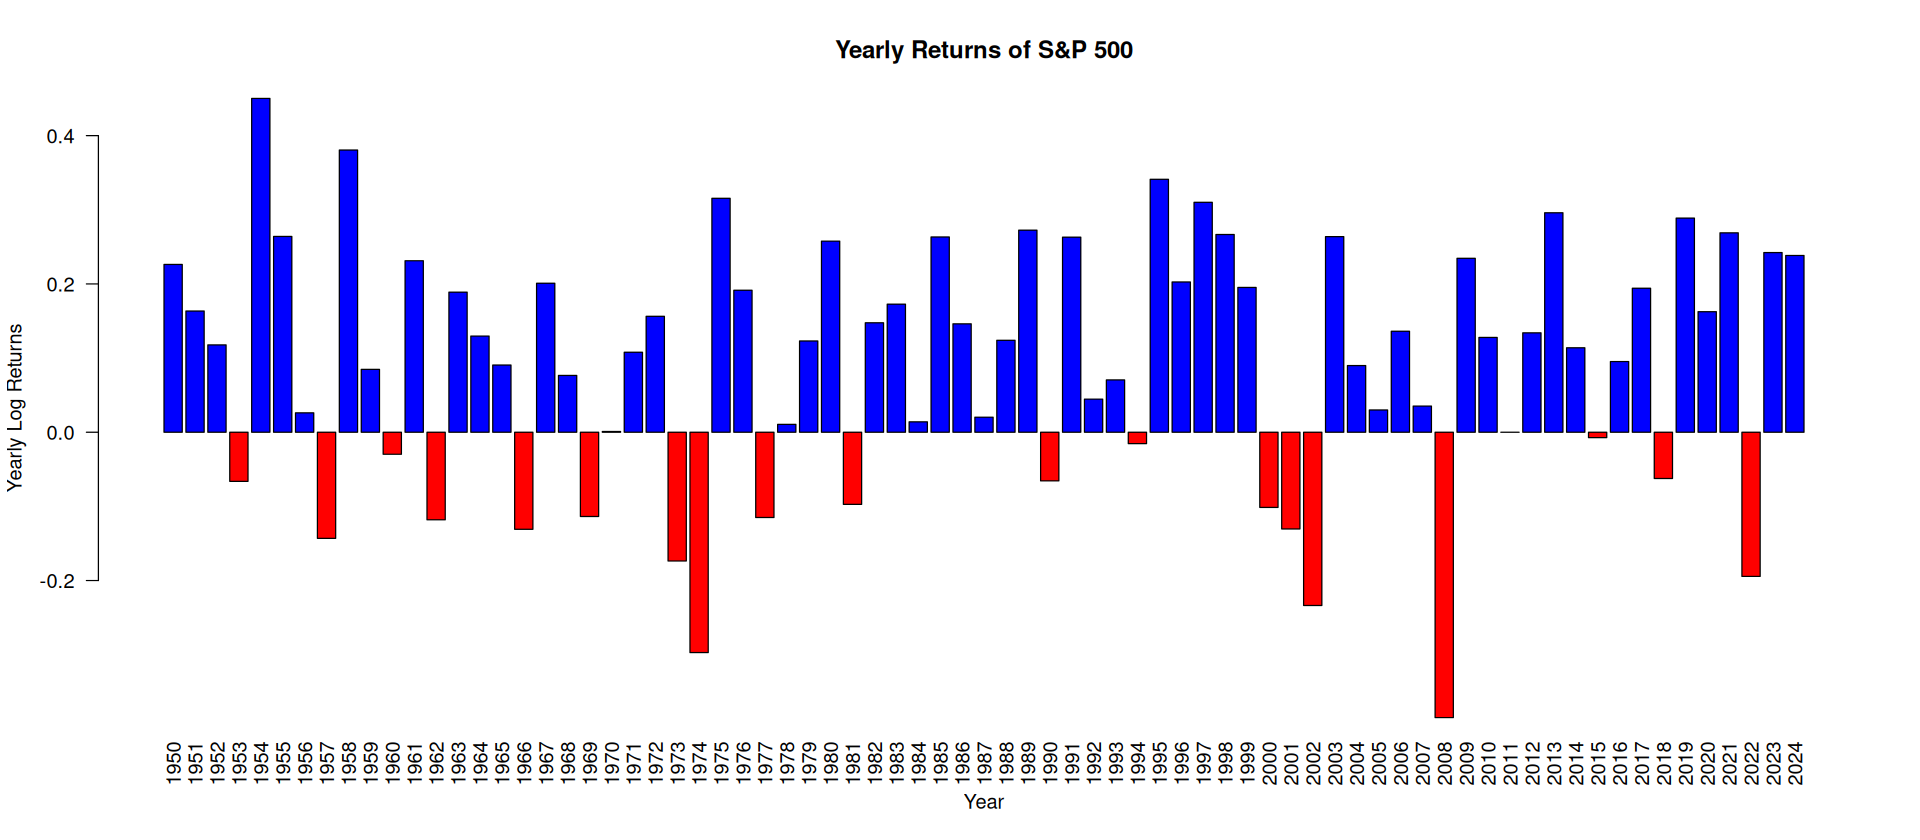

In [30]:
library(quantmod); getSymbols("^GSPC",from="1950-01-01",to="2024-12-31",src="yahoo")
index<-Cl(`GSPC`); returns<- periodReturn(index, period= "yearly", type= "arithmetic")
barplot(as.numeric(returns), names.arg= format(index(returns), "%Y"), col=
ifelse(as.numeric(returns) > 0, "blue", "red"), las= 2, main= "Yearly Returns of S&P 500",
ylab= "Yearly Log Returns", xlab= "Year"); mean(returns); sd(returns)